In [2]:
__author__ = 'Kayli Glidic'

# Import Library

In [3]:
#import the module
from tshirt.pipeline import spec_pipeline

import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

#import bokeh to enable interactive plots
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

output_notebook()

#import yaml to read in the parameter file
import yaml

#imports to use RECTE
import os
from astropy.table import QTable
import astropy.units as u
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join
import pandas as pd
from astropy.time import Time


#import to copy
from copy import deepcopy

#modeling light curves
from scipy.optimize import curve_fit
import batman

#to fix errors
import pdb

#to correct for time differences
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation

Could not import ccdproc, so image processing may not work


Loading BokehJS ...

# CoRoT-1b Batch Processing the Spectroscopic Data

In [4]:
with open("corot1_batch_file.yaml", "r") as stream:
    bparamfile = yaml.safe_load(stream)
    
bparamfile

{'procFiles': ['/fenrirdata1/es_tso/hst/visit01/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit02/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit03/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit04/*_flt.fits'],
 'excludeList': ['ibh717giq_flt.fits',
  'ibh719gkq_flt.fits',
  'ibh720i5q_flt.fits',
  'ibh721olq_flt.fits'],
 'srcName': 'CoRoT-1',
 'srcNameShort': 'corot1',
 'nightName': ['visit1', 'visit2', 'visit3', 'visit4'],
 'dispDirection': 'x',
 'starPositions': [74],
 'refPhotCentering': None,
 'bkgSubDirections': ['Y'],
 'bkgRegionsX': [[None, None]],
 'bkgOrderX': 0,
 'bkgRegionsY': [[[9, 32], [41, 49], [92, 122]],
  [[0, 14], [25, 32], [39, 56], [100, 121]],
  [[9, 32], [39, 46], [92, 122]],
  [[9, 32], [39, 46], [92, 122]]],
 'bkgOrderY': 1,
 'apWidth': 30.0,
 'dispPixels': [0, 128],
 'numSplineKnots': 6,
 'splineSpecFitOrder': 2,
 'sigForBadPx': 300,
 'jdRef': 2457551,
 'timingMethod': None,
 'isCube': False,
 'cubePlane': 0,
 'doCentering': False,
 'FITSextension': 1,
 'HEADextens

In [5]:
bspec = spec_pipeline.batch_spec(batchFile='corot1_batch_file.yaml')

Working on showStarChoices for batch CoRoT-1 corot1_visit1 
Working on showStarChoices for batch CoRoT-1 corot1_visit2 
Working on showStarChoices for batch CoRoT-1 corot1_visit3 
Working on showStarChoices for batch CoRoT-1 corot1_visit4 


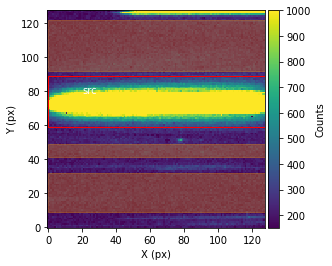

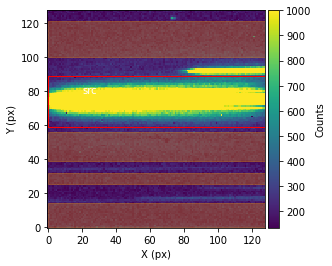

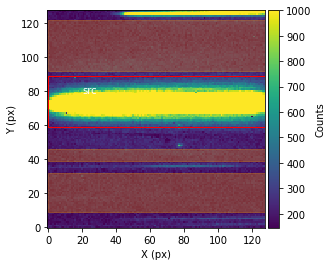

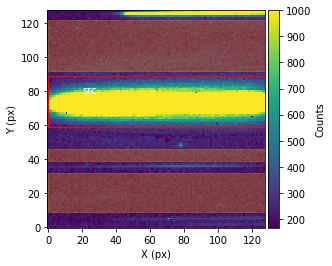

In [6]:
bspec.batch_run('showStarChoices',vmax=1000,showPlot=True)

In [7]:
bspec.batch_run('do_extraction',useMultiprocessing=True)

Working on do_extraction for batch CoRoT-1 corot1_visit1 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit2 
On 0 of 98

On 15 of 98On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit3 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98


/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/phot_pipeline.py:2195: UserWarning: Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data
  warnings.warn("Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data")


On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit4 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98


Working on plot_one_spec for batch CoRoT-1 corot1_visit1 


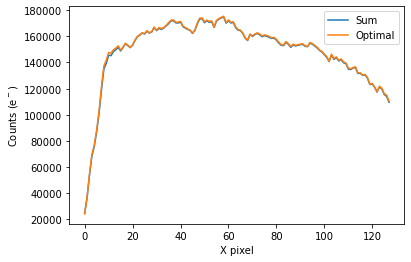

Working on plot_one_spec for batch CoRoT-1 corot1_visit2 


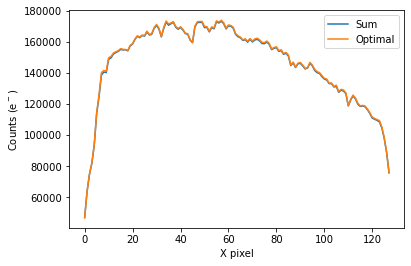

Working on plot_one_spec for batch CoRoT-1 corot1_visit3 


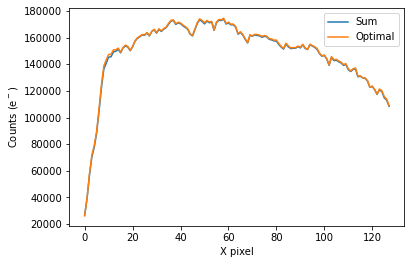

Working on plot_one_spec for batch CoRoT-1 corot1_visit4 


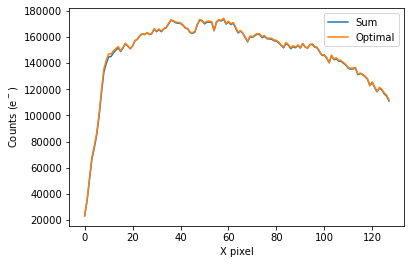

In [8]:
bspec.batch_run('plot_one_spec')

Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 


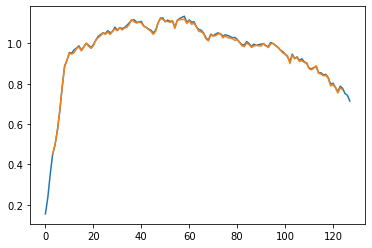

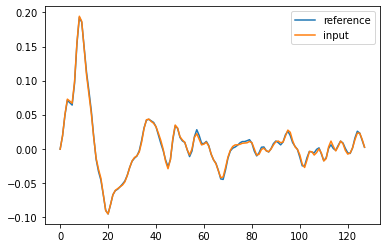

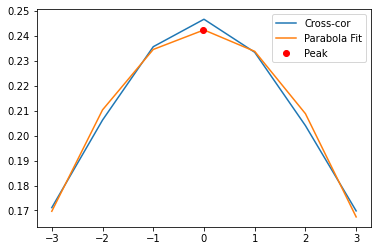

Shift = -0.023030966132883024, or index -0.023030966132882972


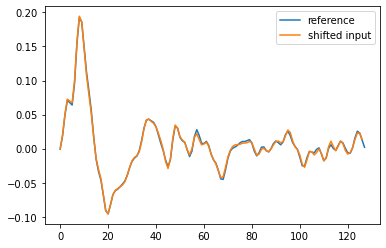

> /home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/spec_pipeline.py(1098)align_spec()
-> align2D[imgInd,:] = analysis.roll_pad(data2D[imgInd,:],offsetInd * self.param['specShiftMultiplier'])
(Pdb) q


BdbQuit: 

In [9]:
bspec.batch_run('plot_dynamic_spec', showPlot=True,align=True,alignDiagnostics=True)

Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit2 


/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/spec_pipeline.py:1189: RuntimeWarning: Mean of empty slice
  avgSpec = np.nanmean(useSpec,0)
/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/spec_pipeline.py:1194: RuntimeWarning: divide by zero encountered in true_divide
  avgSpec_err = np.sqrt(np.nansum(errSpec**2,0)) / np.nansum(specCounts,0)


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit3 


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit4 


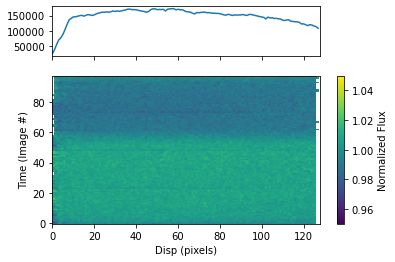

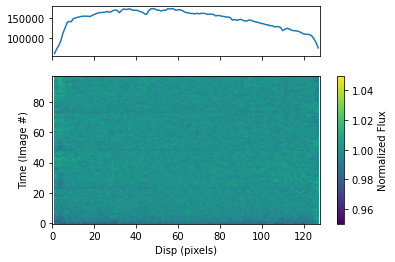

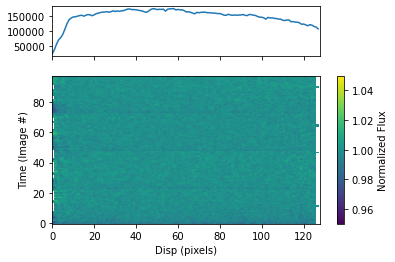

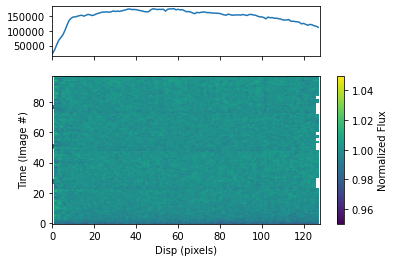

In [10]:
bspec.batch_run('plot_dynamic_spec', showPlot=True,align=True,alignDiagnostics=False)

In [11]:
bspec.batch_run('plot_wavebin_series', nbins=10, interactive=False,dispIndices=[10,118],savePlot=True)

Working on plot_wavebin_series for batch CoRoT-1 corot1_visit1 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit2 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit3 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit4 


# Applying RECTE

In [12]:
#New way to import all the RECTE functions:
import Charge_Correction_Functions
from Charge_Correction_Functions import RECTE,RECTEMulti,calculate_correction, calculate_correction_fast, charge_correction

Loading BokehJS ...

In [13]:
#! /usr/bin/env python
"""calculate RECTE model using a a template grism Image
"""
from __future__ import division, absolute_import
from __future__ import print_function
import itertools


def RECTE(
        cRates,
        tExp,
        exptime=100.651947,
        trap_pop_s=200,
        trap_pop_f=0,
        dTrap_s=0,
        dTrap_f=0,
        dt0=0,
        lost=0,
        mode='staring'
):
    """Hubble Space Telescope ramp effet model

    Parameters:
    cRates -- intrinsic count rate of each exposures, unit e/s
    tExp -- start time of every exposures
    expTime -- (default 180 seconds) exposure time of the time series
    trap_pop -- (default 0) number of occupied traps at the beginning of the observations
    dTrap -- (default [0])number of extra trap added in the gap
    between two orbits
    dt0 -- (default 0) possible exposures before very beginning, e.g.,
    possible guiding adjustment
    lost -- (default 0, no lost) proportion of trapped electrons that are not eventually detected
    (mode) -- (default scanning, scanning or staring, or others), for scanning mode
      observation , the pixel no longer receive photons during the overhead
      time, in staring mode, the pixel keps receiving elctrons
    """
    nTrap_s = 1525.38 
    eta_trap_s = 0.013318 
    tau_trap_s = 1.63e4  # = 1.63e4
    nTrap_f = 162.38
    eta_trap_f = 0.008407
    tau_trap_f = 281.463
    
    #nTrap_s = 2192  # = 1525.38  # 1320.0
    #eta_trap_s = 0.02075  # = 0.013318  # 0.01311
    #tau_trap_s = 1.63e4  # = 1.63e4
    #nTrap_f = 225.7  # = 162.38
    #eta_trap_f = 0.0116  # = 0.008407
    #tau_trap_f = 3344  # = 281.463
    
    # nTrap_s = 1525.38  # 1320.0
    # eta_trap_s = 0.013318  # 0.01311
    # tau_trap_s = 1.63e4
    # nTrap_f = 162.38
    # eta_trap_f = 0.008407
    # tau_trap_f = 281.463

    try:
        dTrap_f = itertools.cycle(dTrap_f)
        dTrap_s = itertools.cycle(dTrap_s)
        dt0 = itertools.cycle(dt0)
    except TypeError:
        dTrap_f = itertools.cycle([dTrap_f])
        dTrap_s = itertools.cycle([dTrap_s])
        dt0 = itertools.cycle([dt0])
    obsCounts = np.zeros(len(tExp))
    trap_pop_s = min(trap_pop_s, nTrap_s)
    trap_pop_f = min(trap_pop_f, nTrap_f)
    dEsList = np.zeros(len(tExp))
    dEfList = np.zeros(len(tExp))
    dt0_i = next(dt0)
    f0 = cRates[0]
    c1_s = eta_trap_s * f0 / nTrap_s + 1 / tau_trap_s  # a key factor
    c1_f = eta_trap_f * f0 / nTrap_f + 1 / tau_trap_f
    dE0_s = (eta_trap_s * f0 / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
    dE0_f = (eta_trap_f * f0 / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
    dE0_s = min(trap_pop_s + dE0_s, nTrap_s) - trap_pop_s
    dE0_f = min(trap_pop_f + dE0_f, nTrap_f) - trap_pop_f
    trap_pop_s = min(trap_pop_s + dE0_s, nTrap_s)
    trap_pop_f = min(trap_pop_f + dE0_f, nTrap_f)
    for i in range(len(tExp)):
        try:
            dt = tExp[i+1] - tExp[i]
        except IndexError:
            dt = exptime
        f_i = cRates[i]
        c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
        c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
        # number of trapped electron during one exposure
        dE1_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * exptime))
        dE1_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * exptime))
        dE1_s = min(trap_pop_s + dE1_s, nTrap_s) - trap_pop_s
        dE1_f = min(trap_pop_f + dE1_f, nTrap_f) - trap_pop_f
        trap_pop_s = min(trap_pop_s + dE1_s, nTrap_s)
        trap_pop_f = min(trap_pop_f + dE1_f, nTrap_f)
        obsCounts[i] = f_i * exptime - dE1_s - dE1_f
        if dt < 5 * exptime:  # whether next exposure is in next batch of exposures
            # same orbits
            if mode == 'scanning':
                # scanning mode, no incoming flux between exposures
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
                dEsList[i] = dE1_s + dE2_s
                dEfList[i] = dE1_f + dE2_f
            elif mode == 'staring':
                # for staring mode, there is flux between exposures
                dE2_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * (dt - exptime)))
                dE2_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * (dt - exptime)))
            else:
                # others, same as scanning
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
            trap_pop_s = min(trap_pop_s + dE2_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE2_f, nTrap_f)
        elif dt < 1200:
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime)/tau_trap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime)/tau_trap_f), nTrap_f)
        else:
            # switch orbit
            dt0_i = next(dt0)
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime-dt0_i)/tau_trap_s) + next(dTrap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime-dt0_i)/tau_trap_f) + next(dTrap_f), nTrap_f)
            f_i = cRates[i + 1]
            c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
            c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
            dE3_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
            dE3_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
            dE3_s = min(trap_pop_s + dE3_s, nTrap_s) - trap_pop_s
            dE3_f = min(trap_pop_f + dE3_f, nTrap_f) - trap_pop_f
            trap_pop_s = min(trap_pop_s + dE3_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE3_f, nTrap_f)
        trap_pop_s = max(trap_pop_s, 0)
        trap_pop_f = max(trap_pop_f, 0)

    return obsCounts

In [14]:
def RECTEMulti(template,
                 variability,
                 tExp,
                 exptime,
                 trap_pop_s=200,
                 trap_pop_f=0,
                 dTrap_s=0,
                 dTrap_f=0,
                 dt0=0,
                 mode='staring'):
    """loop through every pixel in the template
    calculate for 6 orbit
    return
    model light curves

    template -- a template image of the input sereis
    variablities -- normalized model light curves
    tExp -- starting times of each exposure of the time resolved observations
    trap_pop_s -- (default=0)number of initially occupied traps -- slow poplulation
    trap_pop_f -- number of initially occupied traps -- fast poplulation
    dTrap_s -- (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    dTrap_f -- (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    """
    specShape = template.shape #shape of template image of the input sereis. it gives the dimensions of an array 
    outSpec = np.zeros((specShape[0], len(tExp))) #specShape[0] gives the number of rows, this is the shape of this new array. this would return something like : array([0, 0, 0, 0, 0]) but with a length desired. 
    
    for i in range(specShape[0]):
        outSpec[i, :] = RECTE(
            variability * template[i],
            tExp,
            exptime,
            trap_pop_s,
            trap_pop_f,
            dTrap_s=dTrap_s,
            dTrap_f=dTrap_f,
            dt0=dt0,
            lost=0,
            mode=mode)
    return np.sum(outSpec, axis=(0))

In [15]:
def calculate_correction(csv_file,median_image):
    '''
    Calculate the RECTE ramp correction 
    
    Parameters
    ----------
    csv_file: file
        Read in a csv file with all the required data. 
        
    median_image: fits file
        Read in a fits file of the median image         
        '''
    info = pd.read_csv(
        csv_file,
        parse_dates=True,
        index_col='Time (UTC)')
    info['Time'] = np.float32(info.index - info.index.values[0]) / 1e9
    grismInfo = info[info['Filter'] == 'G141']
    exptime = grismInfo['Exp Time'].values[0]
    tExp = grismInfo['Time'].values
    tExp = tExp - tExp[0]
    # cRates = np.ones(len(LC)) * LC.mean() * 1.002
    cRates = np.ones(len(tExp))
    variability = cRates / cRates.mean()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = fits.getdata(median_image)
   # bbox = [0, 128, 59, 89]  # define the bounding box of the area of interest
    bbox = [0, 128, 69, 79]
    xList = np.arange(bbox[0], bbox[1])
    ramps = np.zeros((len(xList), len(tExp)))
    dTrap_fList = [0]
    dTrap_sList = [0]
    dtList = [0]
    full_well = 8e4
    for i, x in enumerate(xList):
        template = im[bbox[2]:bbox[3], x] 
        for j, flux in enumerate(template):
            if flux * exptime > full_well:
                template[j] = full_well / exptime

        obs = RECTEMulti(template, variability, tExp, exptime,
                         dTrap_f=dTrap_fList,
                         dTrap_s=dTrap_sList,
                         trap_pop_f=0,
                         trap_pop_s=200,
                         dt0=dtList,
                         mode='staring')
        obs = obs / exptime / np.nansum(template)
        # ax.plot(tExp, obs, '.', color='0.8', ms=1)
        ramps[i, :] = obs
    ax.plot(tExp, ramps[30, :], '.')
    plt.show()
    return ramps

In [16]:
def calculate_correction_fast(x,exptime,median_image,dtrap_s=[0],trap_pop_s=200,xList=np.arange(0,13)):
    '''
    Calculate the RECTE ramp correction: fast-version 
    
    Parameters
    ----------
    x:  
       Time in JD
         
    exptime: int
        Defines the exposure time for the observation
        
     median_image: fits file
        Read in a fits file of the median image
    
    trap_pop_s: int
        (default=0)number of initially occupied traps -- slow poplulation
   
    dTrap_s: int
        (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
    xList: list 
        A list on the range of Dispersion
    
    '''
    tExp=(x-x[0])*3600*24
    # cRates = np.ones(len(LC)) * LC.mean() * 1.002
    cRates = np.ones(len(tExp))
    variability = cRates / cRates.mean()
    im = median_image
   # bbox = [0, 128, 59, 89]  # define the bounding box of the area of interest
    bbox = [0, 128, 69, 79]
    xList = xList
    ramps = np.zeros((len(xList), len(tExp)))
    dTrap_fList = [0]
    dTrap_sList = [0]
    dtList = [0]
    full_well = 8e4
    for i, x in enumerate(xList):
        template = im[bbox[2]:bbox[3], x]
        for j, flux in enumerate(template):
            if flux * exptime > full_well:
                template[j] = full_well / exptime

        obs = RECTEMulti(template, variability, tExp, exptime,
                         dTrap_f=dTrap_fList,
                         dTrap_s=dtrap_s,
                         trap_pop_f=0,
                         trap_pop_s=trap_pop_s,
                         dt0=dtList,
                         mode='staring')
        obs = obs / exptime / np.nansum(template)
        # ax.plot(tExp, obs, '.', color='0.8', ms=1)
        ramps[i, :] = obs
    return ramps

In [17]:
def charge_correction(self,ramps):
    '''
    Returns the ramp corrected flux data 
    
    Parameters
    ----------
    
    ramps:
        Returns the data for correcting ramp effect. 
        
    '''
    HDUList = fits.open(self.specFile)
    origData = HDUList['OPTIMAL SPEC'].data
    
    newData = deepcopy(origData)
    newData[0,:,:] = origData[0,:,:] / ramps.transpose()
    
    HDUList['OPTIMAL SPEC'].data = newData
    correctedSpecFile = os.path.splitext(self.specFile)[0]+'_corrected.fits'
    HDUList.writeto(correctedSpecFile,overwrite=True)
    
    new_param = deepcopy(self.param)
    new_param['srcNameShort'] = 'corot1_corrected'
    new_spec = spec_pipeline.spec(directParam=new_param)
    new_spec.specFile = correctedSpecFile

    
    return newData,new_spec

## Organizing CoRoT-1b Data

In [18]:
#this convert all the data from the light curves into a table of values called result
result = bspec.batch_run('get_wavebin_series',nbins=10, recalculate=True)

Working on get_wavebin_series for batch CoRoT-1 corot1_visit1 
Working on get_wavebin_series for batch CoRoT-1 corot1_visit2 
Working on get_wavebin_series for batch CoRoT-1 corot1_visit3 
Working on get_wavebin_series for batch CoRoT-1 corot1_visit4 


### Visit 1

In [19]:
#creating a table of data

#flux values
corot1_visit1_flux=result[0][0]
corot1_visit1_flux = corot1_visit1_flux.to_pandas()

#error flux values
corot1_visit1_errors = result[0][1]
corot1_visit1_errors = corot1_visit1_errors.to_pandas()

# place all flt files of the first visit into an array
corot1_visit1_files = os.listdir('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit1/')
#remove the direct image from this array
corot1_visit1_files.remove('ibh717giq_flt.fits')
#make this a dataframe
corot1_visit1_files =pd.DataFrame(corot1_visit1_files,columns = ['file name'])

#time values for the first visit
corot1_visit1_added = Table()
time_visit1 = Time(corot1_visit1_flux['Time'],format='jd')
corot1_visit1_added['Time (UTC)'] = time_visit1.fits
corot1_visit1_added['Time'] = time_visit1.jd
time_visit1 = pd.DataFrame(corot1_visit1_added['Time (UTC)'])
ttime_visit1 = pd.DataFrame(corot1_visit1_added['Time'])

#Value of the exposure time which is the same for all visits in this case 
#To check this value:
#spec = bspec.return_spec_obj(ind=3)
#head = fits.getheader(spec.specFile,extname='ORIG HEADER')
#head['EXPTIME']
expTime=np.full((98, 1), 100.651947, dtype=np.float64)
expTime = pd.DataFrame(expTime,columns = ['Exp Time'])

#assign a number to the orbits 
orbit1 = np.full((23,1), 0, dtype=np.float64)
orbit2 = np.full((25,1), 1, dtype=np.float64)
orbit3 = np.full((25,1),2,dtype=np.float64)
orbit4 = np.full((25,1),3,dtype=np.float64)
orbits_visit1 = (orbit1,orbit2,orbit3,orbit4)
orbits_visit1 = np.concatenate(orbits_visit1)
orbits_visit1 = pd.DataFrame(orbits_visit1,columns = ['orbit'])

#the filter
Filter = np.full((98,1), 'G141')
Filter = pd.DataFrame(Filter,columns = ['Filter'])

In [20]:
merged=pd.merge(corot1_visit1_flux, corot1_visit1_errors, on=['Time'])
data = [corot1_visit1_files,time_visit1,ttime_visit1,expTime,orbits_visit1,Filter]
data_added= pd.concat(data,axis=1)
corot1_visit1_results=pd.merge(data_added,merged,on=['Time'])
corot1_visit1_results.to_csv('corot1_visit1_results.csv')
#corot1_visit1_results.to_csv('corot1_visit1_results.csv')
corot1_visit1_results

,file name,Time (UTC),Time,Exp Time,orbit,Filter,15.000um Flux,25.500um Flux,36.500um Flux,47.500um Flux,...,15.000um Error,25.500um Error,36.500um Error,47.500um Error,58.500um Error,69.000um Error,79.500um Error,90.500um Error,101.500um Error,112.500um Error
0,ibh717gjq_flt.fits,2012-01-23T21:46:18.000,2.455950e+06,100.651947,0.0,G141,0.992004,0.992744,0.992169,0.990066,...,0.000800,0.000798,0.000754,0.000753,0.000743,0.000820,0.000786,0.000790,0.000812,0.000851
1,ibh717gkq_flt.fits,2012-01-23T21:48:17.000,2.455950e+06,100.651947,0.0,G141,0.996425,0.998077,0.997128,0.997055,...,0.000801,0.000799,0.000755,0.000755,0.000745,0.000822,0.000789,0.000792,0.000815,0.000853
2,ibh717glq_flt.fits,2012-01-23T21:50:16.000,2.455950e+06,100.651947,0.0,G141,1.000419,0.999803,0.998174,0.999152,...,0.000804,0.000802,0.000756,0.000755,0.000745,0.000822,0.000789,0.000792,0.000814,0.000852
3,ibh717gmq_flt.fits,2012-01-23T21:52:15.000,2.455950e+06,100.651947,0.0,G141,0.999358,0.999434,0.998469,1.000408,...,0.000803,0.000800,0.000756,0.000756,0.000746,0.000823,0.000789,0.000792,0.000815,0.000853
4,ibh717gnq_flt.fits,2012-01-23T21:54:14.000,2.455950e+06,100.651947,0.0,G141,1.001437,1.000168,1.001166,1.000549,...,0.000803,0.000801,0.000757,0.000756,0.000746,0.000823,0.000789,0.000793,0.000815,0.000853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ibh717klq_flt.fits,2012-01-24T03:09:26.000,2.455951e+06,100.651947,3.0,G141,0.987068,0.987966,0.985668,0.988162,...,0.000799,0.000795,0.000751,0.000750,0.000740,0.000816,0.000784,0.000787,0.000810,0.000848
94,ibh717kmq_flt.fits,2012-01-24T03:11:25.000,2.455951e+06,100.651947,3.0,G141,0.989460,0.986980,0.988025,0.990856,...,0.000801,0.000796,0.000752,0.000751,0.000741,0.000818,0.000785,0.000788,0.000810,0.000848
95,ibh717knq_flt.fits,2012-01-24T03:13:24.000,2.455951e+06,100.651947,3.0,G141,0.991991,0.992339,0.989467,0.991358,...,0.000801,0.000796,0.000752,0.000752,0.000742,0.000819,0.000786,0.000788,0.000811,0.000850
96,ibh717koq_flt.fits,2012-01-24T03:15:23.000,2.455951e+06,100.651947,3.0,G141,0.991624,0.992271,0.993140,0.992739,...,0.000801,0.000797,0.000754,0.000753,0.000742,0.000819,0.000787,0.000790,0.000812,0.000850


### Creating a Median Image Visit 1

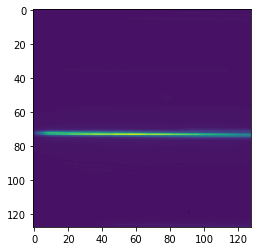

In [21]:
#get information from the header of one of the files in this visit
head = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit1/ibh717gjq_flt.fits',extname='SCI')
#head

#python order them from z,y,x:
cube3d = np.zeros([len(corot1_visit1_results),head['NAXIS2'],head['NAXIS1']])
cube3d.shape

#loop through all the image in this visit 
for ind,oneFile in enumerate(corot1_visit1_results['file name']):
    cube3d[ind,:,:] = fits.getdata("/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit1/{}".format(oneFile),extname='SCI')

#view one of the images
#%matplotlib inline
#plt.plot(cube3d[15,:,40])
#plt.xlim(60,80)

#create the median image and plot
medianImage = np.median(cube3d,axis=0)
plt.imshow(medianImage)

outHDU = fits.PrimaryHDU(medianImage,head)
#outHDU.writeto('corot1_visit1_median_image.fits')


### RECTE
CoRoT1-b Visit1

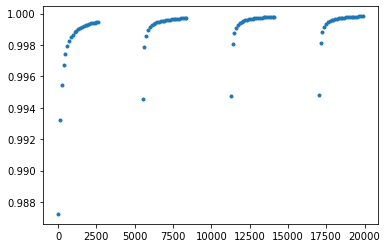

In [22]:
ramps_v1=calculate_correction('corot1_visit1_results.csv', 'corot1_visit1_median_image.fits')

spec_v1 = bspec.return_spec_obj(ind=0)
#spec_v1.specFile
 
correcteddata_v1, new_spec_v1 = charge_correction(spec_v1,ramps_v1)
#correcteddata_v1

In [23]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#new_spec.dyn_specFile()
#spec.dyn_specFile()

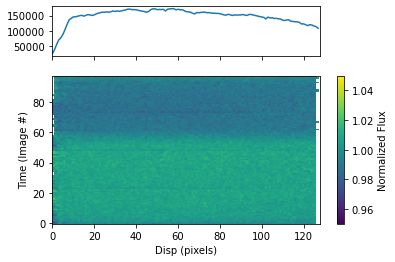

In [24]:
#checking the original dynamic spectrum 
spec_v1.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

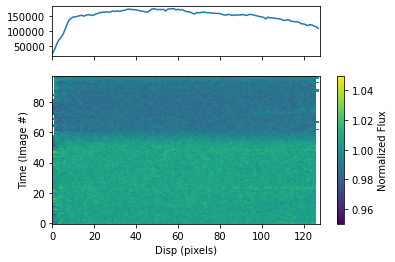

In [25]:
#checking the new dynamic spectrum 
new_spec_v1.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

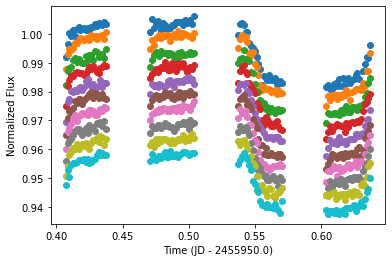

In [26]:
#original light curve
spec_v1.plot_wavebin_series(nbins=10,savePlot=False,dispIndices=[10,118])

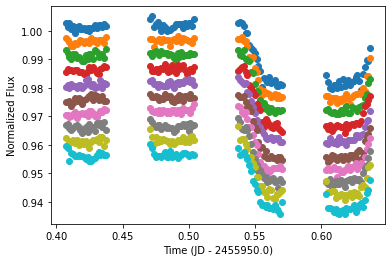

In [27]:
#new light curve
new_spec_v1.plot_wavebin_series(nbins=10,savePlot=False,dispIndices=[10,118])

###  Visit 2 

In [28]:
#creating a table of data

#flux values
corot1_visit2_flux=result[1][0]
corot1_visit2_flux = corot1_visit2_flux.to_pandas()

#error flux values
corot1_visit2_errors = result[1][1]
corot1_visit2_errors = corot1_visit2_errors.to_pandas()

# place all flt files of the first visit into an array
corot1_visit2_files = os.listdir('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit2/')
#remove the direct image from this array
corot1_visit2_files.remove('ibh719gkq_flt.fits')

#make this a dataframe
corot1_visit2_files =pd.DataFrame(corot1_visit2_files,columns = ['file name'])

#time values for the first visit
corot1_visit2_added = Table()
time_visit2 = Time(corot1_visit2_flux['Time'],format='jd')
corot1_visit2_added['Time (UTC)'] = time_visit2.fits
corot1_visit2_added['Time'] = time_visit2.jd
time_visit2 = pd.DataFrame(corot1_visit2_added['Time (UTC)'])
ttime_visit2 = pd.DataFrame(corot1_visit2_added['Time'])

#Value of the exposure time which is the same for all visits in this case 
#To check this value:
#spec = bspec.return_spec_obj(ind=3)
#head = fits.getheader(spec.specFile,extname='ORIG HEADER')
#head['EXPTIME']
expTime=np.full((98, 1), 100.651947, dtype=np.float64)
expTime = pd.DataFrame(expTime,columns = ['Exp Time'])

#assign a number to the orbits 
orbit1 = np.full((23,1), 0, dtype=np.float64)
orbit2 = np.full((25,1), 1, dtype=np.float64)
orbit3 = np.full((25,1),2,dtype=np.float64)
orbit4 = np.full((25,1),3,dtype=np.float64)
orbits_visit2 = (orbit1,orbit2,orbit3,orbit4)
orbits_visit2 = np.concatenate(orbits_visit2)
orbits_visit2 = pd.DataFrame(orbits_visit2,columns = ['orbit'])

#the filter
Filter = np.full((98,1), 'G141')
Filter = pd.DataFrame(Filter,columns = ['Filter'])

In [29]:
merged2=pd.merge(corot1_visit2_flux, corot1_visit2_errors, on=['Time'])
data2 = [corot1_visit2_files,time_visit2,ttime_visit2,expTime,orbits_visit2,Filter]
data_added2= pd.concat(data2,axis=1)
corot1_visit2_results=pd.merge(data_added2,merged2,on=['Time'])
corot1_visit2_results.to_csv('corot1_visit2_results.csv')
#corot1_visit2_results.to_csv('corot1_visit2_results.csv')
corot1_visit2_results

,file name,Time (UTC),Time,Exp Time,orbit,Filter,15.000um Flux,25.500um Flux,36.500um Flux,47.500um Flux,...,15.000um Error,25.500um Error,36.500um Error,47.500um Error,58.500um Error,69.000um Error,79.500um Error,90.500um Error,101.500um Error,112.500um Error
0,ibh719gmq_flt.fits,2012-01-17T02:54:26.000,2.455944e+06,100.651947,0.0,G141,0.983084,0.981333,0.986355,0.986451,...,0.000813,0.000780,0.000749,0.000755,0.000744,0.000814,0.000782,0.000814,0.000847,0.000893
1,ibh719gnq_flt.fits,2012-01-17T02:56:25.000,2.455944e+06,100.651947,0.0,G141,0.991439,0.988663,0.991172,0.991166,...,0.000818,0.000778,0.000750,0.000758,0.000746,0.000815,0.000784,0.000816,0.000848,0.000894
2,ibh719goq_flt.fits,2012-01-17T02:58:24.000,2.455944e+06,100.651947,0.0,G141,0.993443,0.992361,0.995088,0.994916,...,0.000814,0.000777,0.000752,0.000760,0.000747,0.000815,0.000785,0.000818,0.000850,0.000895
3,ibh719gpq_flt.fits,2012-01-17T03:00:23.000,2.455944e+06,100.651947,0.0,G141,0.995463,0.993084,0.995380,0.994618,...,0.000818,0.000780,0.000752,0.000759,0.000747,0.000816,0.000785,0.000817,0.000850,0.000896
4,ibh719gqq_flt.fits,2012-01-17T03:02:22.000,2.455944e+06,100.651947,0.0,G141,0.995448,0.996664,0.995727,0.995144,...,0.000820,0.000781,0.000752,0.000759,0.000747,0.000816,0.000785,0.000818,0.000850,0.000896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ibh719k6q_flt.fits,2012-01-17T08:17:33.000,2.455944e+06,100.651947,3.0,G141,0.998570,1.000345,1.000876,1.000313,...,0.000821,0.000779,0.000754,0.000762,0.000749,0.000818,0.000786,0.000819,0.000852,0.000899
94,ibh719k7q_flt.fits,2012-01-17T08:19:32.000,2.455944e+06,100.651947,3.0,G141,0.999401,1.000566,0.999294,1.002564,...,0.000823,0.000781,0.000753,0.000760,0.000747,0.000817,0.000786,0.000819,0.000852,0.000898
95,ibh719k8q_flt.fits,2012-01-17T08:21:31.000,2.455944e+06,100.651947,3.0,G141,1.000000,1.000129,1.000100,1.001662,...,0.000820,0.000786,0.000754,0.000759,0.000748,0.000818,0.000786,0.000819,0.000851,0.000898
96,ibh719k9q_flt.fits,2012-01-17T08:23:30.000,2.455944e+06,100.651947,3.0,G141,1.001206,0.999318,0.999750,1.000657,...,0.000821,0.000780,0.000754,0.000761,0.000749,0.000818,0.000786,0.000819,0.000853,0.000899


### Creating a Median Image Visit 2

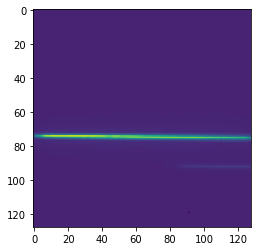

In [30]:
#get information from the header of one of the files in this visit
head_visit2 = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit2/ibh719gkq_flt.fits',extname='SCI')
#head

#python order them from z,y,x:
cube3d_visit2 = np.zeros([len(corot1_visit2_results),head_visit2['NAXIS2'],head_visit2['NAXIS1']])
cube3d_visit2.shape

#loop through all the image in this visit 
for ind,oneFile in enumerate(corot1_visit2_results['file name']):
    cube3d_visit2[ind,:,:] = fits.getdata("/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit2/{}".format(oneFile),extname='SCI')

#view one of the images
#%matplotlib inline
#plt.plot(cube3d_v2[15,:,40])
#plt.xlim(60,80)

#create the median image and plot
medianImage_visit2 = np.median(cube3d_visit2,axis=0)
plt.imshow(medianImage_visit2)

outHDU_visit2 = fits.PrimaryHDU(medianImage_visit2,head_visit2)
#outHDU_visit2.writeto('corot1_visit2_median_image.fits')

### RECTE
CoRoT1-b Visit2

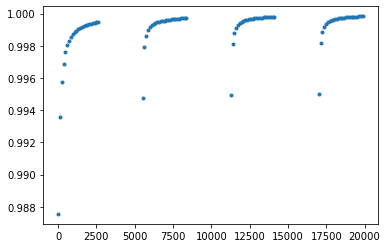

In [31]:
ramps_v2=calculate_correction('corot1_visit2_results.csv', 'corot1_visit2_median_image.fits')

spec_v2 = bspec.return_spec_obj(ind=1)
#spec_v2.specFile

correcteddata_v2, new_spec_v2 = charge_correction(spec_v2,ramps_v2)
#correcteddata_v2

In [32]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#print(new_spec_v2.dyn_specFile())
#print(spec_v2.dyn_specFile())

/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/spec_pipeline.py:1189: RuntimeWarning: Mean of empty slice
  avgSpec = np.nanmean(useSpec,0)
/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/spec_pipeline.py:1194: RuntimeWarning: divide by zero encountered in true_divide
  avgSpec_err = np.sqrt(np.nansum(errSpec**2,0)) / np.nansum(specCounts,0)


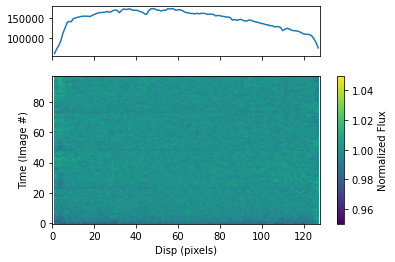

In [33]:
#checking the original dynamic spectrum 
spec_v2.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/spec_pipeline.py:1189: RuntimeWarning: Mean of empty slice
  avgSpec = np.nanmean(useSpec,0)
/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/spec_pipeline.py:1194: RuntimeWarning: divide by zero encountered in true_divide
  avgSpec_err = np.sqrt(np.nansum(errSpec**2,0)) / np.nansum(specCounts,0)


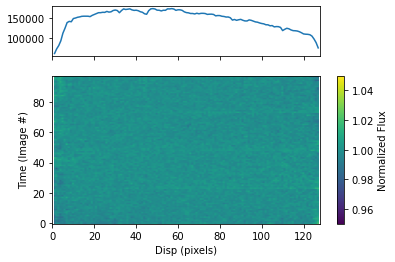

In [34]:
#checking the new dynamic spectrum 
new_spec_v2.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

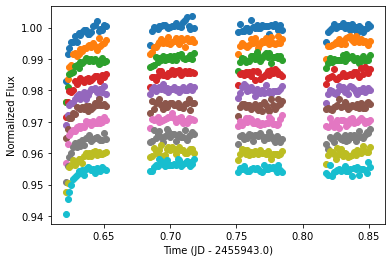

In [35]:
#original light curve
spec_v2.plot_wavebin_series(nbins=10,savePlot=False,dispIndices=[10,118])

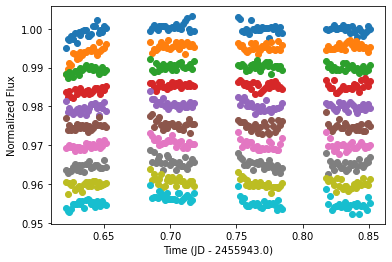

In [36]:
#new light curve
new_spec_v2.plot_wavebin_series(nbins=10,savePlot=False,dispIndices=[10,118])

### Vist 3

In [37]:
#creating a table of data

#flux values
corot1_visit3_flux=result[2][0]
corot1_visit3_flux = corot1_visit3_flux.to_pandas()

#error flux values
corot1_visit3_errors = result[2][1]
corot1_visit3_errors = corot1_visit3_errors.to_pandas()

# place all flt files of the first visit into an array
corot1_visit3_files = os.listdir('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit3/')
#remove the direct image from this array
corot1_visit3_files.remove('ibh720i5q_flt.fits')

#make this a dataframe
corot1_visit3_files =pd.DataFrame(corot1_visit3_files,columns = ['file name'])

#time values for the first visit
corot1_visit3_added = Table()
time_visit3 = Time(corot1_visit3_flux['Time'],format='jd')
corot1_visit3_added['Time (UTC)'] = time_visit3.fits
corot1_visit3_added['Time'] = time_visit3.jd
time_visit3 = pd.DataFrame(corot1_visit3_added['Time (UTC)'])
ttime_visit3 = pd.DataFrame(corot1_visit3_added['Time'])

#Value of the exposure time which is the same for all visits in this case 
#To check this value:
#spec = bspec.return_spec_obj(ind=3)
#head = fits.getheader(spec.specFile,extname='ORIG HEADER')
#head['EXPTIME']
expTime=np.full((98, 1), 100.651947, dtype=np.float64)
expTime = pd.DataFrame(expTime,columns = ['Exp Time'])

#assign a number to the orbits 
orbit1 = np.full((23,1), 0, dtype=np.float64)
orbit2 = np.full((25,1), 1, dtype=np.float64)
orbit3 = np.full((25,1),2,dtype=np.float64)
orbit4 = np.full((25,1),3,dtype=np.float64)
orbits_visit3 = (orbit1,orbit2,orbit3,orbit4)
orbits_visit3 = np.concatenate(orbits_visit3)
orbits_visit3 = pd.DataFrame(orbits_visit3,columns = ['orbit'])

#the filter
Filter = np.full((98,1), 'G141')
Filter = pd.DataFrame(Filter,columns = ['Filter'])

In [38]:
merged3=pd.merge(corot1_visit3_flux, corot1_visit3_errors, on=['Time'])
data3 = [corot1_visit3_files,time_visit3,ttime_visit3,expTime,orbits_visit3,Filter]
data_added3= pd.concat(data3,axis=1)
corot1_visit3_results=pd.merge(data_added3,merged3,on=['Time'])
corot1_visit3_results.to_csv('corot1_visit3_results.csv')
#corot1_visit3_results.to_csv('corot1_visit3_results.csv')
corot1_visit3_results

,file name,Time (UTC),Time,Exp Time,orbit,Filter,15.000um Flux,25.500um Flux,36.500um Flux,47.500um Flux,...,15.000um Error,25.500um Error,36.500um Error,47.500um Error,58.500um Error,69.000um Error,79.500um Error,90.500um Error,101.500um Error,112.500um Error
0,ibh720i6q_flt.fits,2012-01-27T16:43:33.000,2.455954e+06,100.651947,0.0,G141,0.990118,0.990995,0.991091,0.990497,...,0.000804,0.000795,0.000754,0.000752,0.000744,0.000819,0.000786,0.000790,0.000815,0.000852
1,ibh720i7q_flt.fits,2012-01-27T16:45:32.000,2.455954e+06,100.651947,0.0,G141,0.993090,0.993900,0.995577,0.995126,...,0.000803,0.000796,0.000754,0.000753,0.000745,0.000820,0.000788,0.000791,0.000815,0.000853
2,ibh720i8q_flt.fits,2012-01-27T16:47:31.000,2.455954e+06,100.651947,0.0,G141,0.997714,0.993844,0.997259,0.996876,...,0.000806,0.000796,0.000755,0.000754,0.000746,0.000821,0.000788,0.000791,0.000816,0.000853
3,ibh720i9q_flt.fits,2012-01-27T16:49:30.000,2.455954e+06,100.651947,0.0,G141,0.995112,0.995710,0.997914,0.997023,...,0.000806,0.000797,0.000755,0.000753,0.000745,0.000821,0.000788,0.000791,0.000815,0.000853
4,ibh720iaq_flt.fits,2012-01-27T16:51:29.000,2.455954e+06,100.651947,0.0,G141,0.998401,0.997949,0.998627,0.998010,...,0.000803,0.000795,0.000755,0.000753,0.000745,0.000820,0.000787,0.000791,0.000815,0.000852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ibh720kyq_flt.fits,2012-01-27T22:10:39.000,2.455954e+06,100.651947,3.0,G141,0.999940,0.999761,1.001486,1.000837,...,0.000807,0.000797,0.000756,0.000754,0.000746,0.000821,0.000789,0.000792,0.000816,0.000853
94,ibh720kzq_flt.fits,2012-01-27T22:12:38.000,2.455954e+06,100.651947,3.0,G141,1.001532,1.001297,1.000872,1.000956,...,0.000809,0.000796,0.000756,0.000755,0.000746,0.000821,0.000789,0.000792,0.000817,0.000853
95,ibh720l0q_flt.fits,2012-01-27T22:14:37.000,2.455954e+06,100.651947,3.0,G141,1.000622,1.000584,1.001149,1.000244,...,0.000810,0.000801,0.000756,0.000753,0.000746,0.000821,0.000789,0.000792,0.000816,0.000854
96,ibh720l1q_flt.fits,2012-01-27T22:16:36.000,2.455954e+06,100.651947,3.0,G141,1.000097,1.001724,1.000968,1.000948,...,0.000810,0.000801,0.000756,0.000753,0.000746,0.000822,0.000789,0.000793,0.000817,0.000853


### Creating a Median Image Visit 3

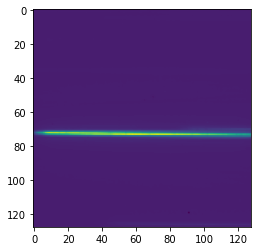

In [39]:
#get information from the header of one of the files in this visit
head_visit3 = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit3/ibh720i5q_flt.fits',extname='SCI')
#head

#python order them from z,y,x:
cube3d_visit3 = np.zeros([len(corot1_visit3_results),head_visit3['NAXIS2'],head_visit3['NAXIS1']])
cube3d_visit3.shape

#loop through all the image in this visit 
for ind,oneFile in enumerate(corot1_visit3_results['file name']):
    cube3d_visit3[ind,:,:] = fits.getdata("/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit3/{}".format(oneFile),extname='SCI')

#view one of the images
#%matplotlib inline
#plt.plot(cube3d_v2[15,:,40])
#plt.xlim(60,80)

#create the median image and plot
medianImage_visit3= np.median(cube3d_visit3,axis=0)
plt.imshow(medianImage_visit3)

outHDU_visit3 = fits.PrimaryHDU(medianImage_visit3,head_visit3)
#outHDU_visit3.writeto('corot1_visit3_median_image.fits')

### RECTE
CoRoT1-b Visit3

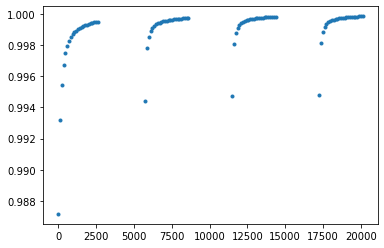

In [40]:
ramps_v3=calculate_correction('corot1_visit3_results.csv', 'corot1_visit3_median_image.fits')

spec_v3 = bspec.return_spec_obj(ind=2)
#spec_v3.specFile

correcteddata_v3, new_spec_v3 = charge_correction(spec_v3,ramps_v3)
#correcteddata_v3

In [41]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#print(new_spec_v2.dyn_specFile())
#print(spec_v2.dyn_specFile())

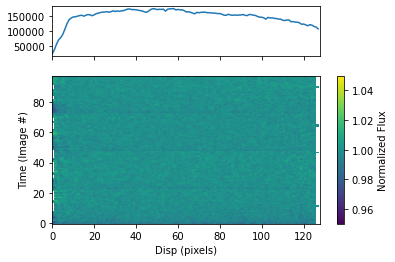

In [42]:
#checking the original dynamic spectrum 
spec_v3.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

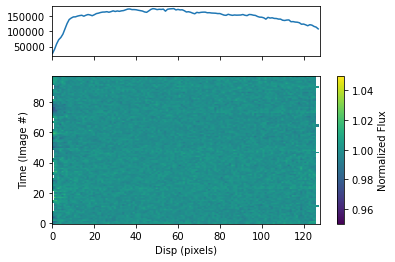

In [43]:
#checking the new dynamic spectrum 
new_spec_v3.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

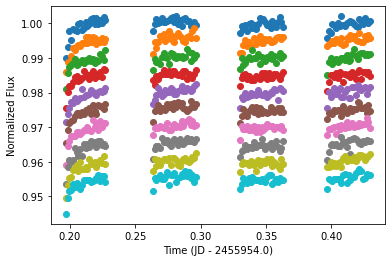

In [44]:
#original light curve
spec_v3.plot_wavebin_series(nbins=10,savePlot=False,dispIndices=[10,118])

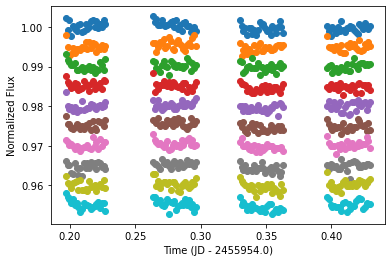

In [45]:
#new light curve
new_spec_v3.plot_wavebin_series(nbins=10,savePlot=False,dispIndices=[10,118])

### Visit 4

In [46]:
#creating a table of data

#flux values
corot1_visit4_flux=result[3][0]
corot1_visit4_flux = corot1_visit4_flux.to_pandas()

#error flux values
corot1_visit4_errors = result[3][1]
corot1_visit4_errors = corot1_visit4_errors.to_pandas()

# place all flt files of the first visit into an array
corot1_visit4_files = os.listdir('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit4/')
#remove the direct image from this array
corot1_visit4_files.remove('ibh721olq_flt.fits')

#make this a dataframe
corot1_visit4_files =pd.DataFrame(corot1_visit4_files,columns = ['file name'])

#time values for the first visit
corot1_visit4_added = Table()
time_visit4 = Time(corot1_visit4_flux['Time'],format='jd')
corot1_visit4_added['Time (UTC)'] = time_visit4.fits
corot1_visit4_added['Time'] = time_visit4.jd
time_visit4 = pd.DataFrame(corot1_visit4_added['Time (UTC)'])
ttime_visit4 = pd.DataFrame(corot1_visit4_added['Time'])

#Value of the exposure time which is the same for all visits in this case 
#To check this value:
#spec = bspec.return_spec_obj(ind=3)
#head = fits.getheader(spec.specFile,extname='ORIG HEADER')
#head['EXPTIME']
expTime=np.full((98, 1), 100.651947, dtype=np.float64)
expTime = pd.DataFrame(expTime,columns = ['Exp Time'])

#assign a number to the orbits 
orbit1 = np.full((23,1), 0, dtype=np.float64)
orbit2 = np.full((25,1), 1, dtype=np.float64)
orbit3 = np.full((25,1),2,dtype=np.float64)
orbit4 = np.full((25,1),3,dtype=np.float64)
orbits_visit4 = (orbit1,orbit2,orbit3,orbit4)
orbits_visit4 = np.concatenate(orbits_visit4)
orbits_visit4 = pd.DataFrame(orbits_visit4,columns = ['orbit'])

#the filter
Filter = np.full((98,1), 'G141')
Filter = pd.DataFrame(Filter,columns = ['Filter'])

In [47]:
merged4=pd.merge(corot1_visit4_flux, corot1_visit4_errors, on=['Time'])
data4 = [corot1_visit4_files,time_visit4,ttime_visit4,expTime,orbits_visit4,Filter]
data_added4= pd.concat(data4,axis=1)
corot1_visit4_results=pd.merge(data_added4,merged4,on=['Time'])
corot1_visit4_results.to_csv('corot1_visit4_results.csv')
#corot1_visit4_results.to_csv('corot1_visit4_results.csv')
corot1_visit4_results

,file name,Time (UTC),Time,Exp Time,orbit,Filter,15.000um Flux,25.500um Flux,36.500um Flux,47.500um Flux,...,15.000um Error,25.500um Error,36.500um Error,47.500um Error,58.500um Error,69.000um Error,79.500um Error,90.500um Error,101.500um Error,112.500um Error
0,ibh721omq_flt.fits,2012-02-05T17:54:45.000,2.455963e+06,100.651947,0.0,G141,0.985876,0.984447,0.988194,0.986887,...,0.000799,0.000798,0.000752,0.000751,0.000742,0.000816,0.000783,0.000787,0.000810,0.000846
1,ibh721onq_flt.fits,2012-02-05T17:56:44.000,2.455963e+06,100.651947,0.0,G141,0.992617,0.991975,0.992654,0.993129,...,0.000803,0.000802,0.000755,0.000753,0.000743,0.000818,0.000785,0.000789,0.000812,0.000849
2,ibh721ooq_flt.fits,2012-02-05T17:58:43.000,2.455963e+06,100.651947,0.0,G141,0.993715,0.994571,0.993942,0.994423,...,0.000800,0.000800,0.000754,0.000753,0.000744,0.000819,0.000786,0.000790,0.000813,0.000850
3,ibh721opq_flt.fits,2012-02-05T18:00:42.000,2.455963e+06,100.651947,0.0,G141,0.997468,0.995643,0.996549,0.996418,...,0.000800,0.000800,0.000755,0.000754,0.000745,0.000819,0.000786,0.000790,0.000812,0.000850
4,ibh721oqq_flt.fits,2012-02-05T18:02:41.000,2.455963e+06,100.651947,0.0,G141,0.996755,0.997185,0.996732,0.997765,...,0.000802,0.000802,0.000755,0.000754,0.000744,0.000819,0.000787,0.000791,0.000813,0.000850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ibh721req_flt.fits,2012-02-05T23:18:03.000,2.455963e+06,100.651947,3.0,G141,0.999663,1.002347,1.002132,1.002098,...,0.000807,0.000803,0.000756,0.000756,0.000746,0.000821,0.000789,0.000793,0.000816,0.000853
94,ibh721rfq_flt.fits,2012-02-05T23:20:02.000,2.455963e+06,100.651947,3.0,G141,1.001501,1.002358,1.002037,1.001557,...,0.000805,0.000804,0.000757,0.000755,0.000746,0.000821,0.000788,0.000793,0.000815,0.000853
95,ibh721rgq_flt.fits,2012-02-05T23:22:01.000,2.455963e+06,100.651947,3.0,G141,1.001013,1.001955,1.001349,0.998375,...,0.000807,0.000802,0.000756,0.000755,0.000746,0.000821,0.000789,0.000793,0.000814,0.000852
96,ibh721rhq_flt.fits,2012-02-05T23:24:00.000,2.455963e+06,100.651947,3.0,G141,1.000288,1.000324,1.001472,1.001603,...,0.000806,0.000803,0.000756,0.000754,0.000746,0.000821,0.000788,0.000792,0.000814,0.000852


### Creating a Median Image Visit 4

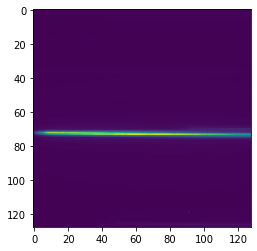

In [48]:
#get information from the header of one of the files in this visit
head_visit4 = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit4/ibh721omq_flt.fits',extname='SCI')
#head

#python order them from z,y,x:
cube3d_visit4 = np.zeros([len(corot1_visit4_results),head_visit4['NAXIS2'],head_visit4['NAXIS1']])
cube3d_visit4.shape

#loop through all the image in this visit 
for ind,oneFile in enumerate(corot1_visit4_results['file name']):
    cube3d_visit4[ind,:,:] = fits.getdata("/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit4/{}".format(oneFile),extname='SCI')

#view one of the images
#%matplotlib inline
#plt.plot(cube3d_v2[15,:,40])
#plt.xlim(60,80)

#create the median image and plot
medianImage_visit4 = np.median(cube3d_visit4,axis=0)
plt.imshow(medianImage_visit4)

outHDU_visit4 = fits.PrimaryHDU(medianImage_visit4,head_visit4)
#outHDU_visit4.writeto('corot1_visit4_median_image.fits')

### RECTE
CoRoT1-b Visit4

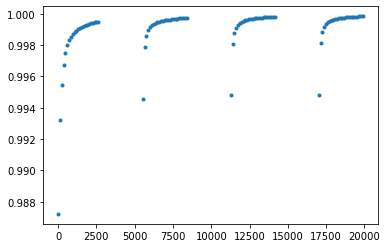

In [49]:
ramps_v4=calculate_correction('corot1_visit4_results.csv', 'corot1_visit4_median_image.fits')

spec_v4= bspec.return_spec_obj(ind=3)
#spec_v4.specFile

correcteddata_v4, new_spec_v4 = charge_correction(spec_v4,ramps_v4)
#correcteddata_v4

In [50]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#print(new_spec_v4.dyn_specFile())
#print(spec_v4.dyn_specFile())

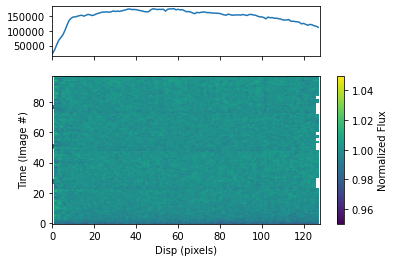

In [51]:
#checking the original dynamic spectrum 
spec_v4.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

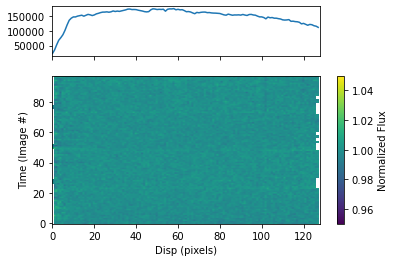

In [52]:
#checking the new dynamic spectrum 
new_spec_v4.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

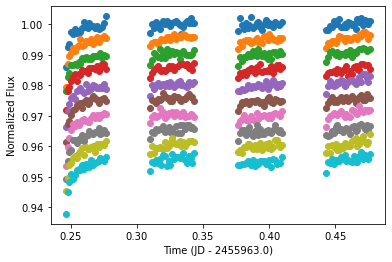

In [53]:
#original light curve
spec_v4.plot_wavebin_series(nbins=10,savePlot=False,dispIndices=[10,118])

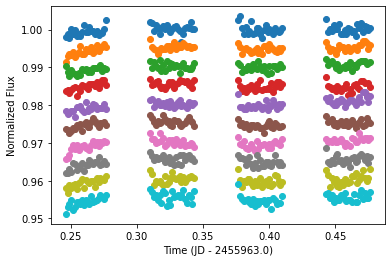

In [54]:
#new light curve
new_spec_v4.plot_wavebin_series(nbins=10,savePlot=False,dispIndices=[10,118])

# Modeling Transit/Eclipses

In [55]:
#getting the values for planet radius and semi-major axis in units of stellar radii

#planet radius (in units of stellar radii)
rp =1.715 * u.Rjupiter #Bonomo et al. 2017
Rstar = 1.230 * u.Rsun #Bonomo et al. 2017
planet_radius = (rp/Rstar).si.value
#planet_radius = 0.1433 #Bean 2009

#semi-major axis (in units of stellar radii)
a = 0.02752 * u.au  #Bonomo et al. 2017
a_over_r = (a/Rstar).si.value
#a_over_r = 4.751 #Bean 2009

In [56]:
params_transit = batman.TransitParams()       #object to store transit parameters

params_transit.t0 = 2454138.32807 #Mid-point(days) Bonomo et al. 2017       #time of inferior conjunction
params_transit.per = 1.5089682  #(days) Bonomo et al. 2017                  #orbital period
#params_transit.rp =  planet_radius #Bonomo et al. 2017                      #planet radius (in units of stellar radii)
params_transit.a = a_over_r #Bonomo et al. 2017                             #semi-major axis (in units of stellar radii)
params_transit.inc =85.15 #Bonomo et al. 2017#83.88   #Bean 2009            #orbital inclination (in degrees)
params_transit.ecc = 0.     #Bonomo et al. 2017                             #eccentricity
params_transit.w = 90.                                                      #longitude of periastron (in degrees)
params_transit.limb_dark = "nonlinear"                                      #limb darkening model
params_transit.u = [0.5, 0.1, 0.1, -0.1]                                    #limb darkening coefficients [u1, u2, u3, u4]

def transit_model(x, rp,a, b):
    '''
    Models transit light curve based on initial parameters
    
    Parameters
    ----------
    
    x: 
        Time in days 
    rp: int
        Radius of the planet
    a: int
        Flux Normalization value
    b: int
        Slope Flux Normalization value
    '''
    params_transit.rp = rp
    m = batman.TransitModel(params_transit, x)
    flux = m.light_curve(params_transit)*(a+b*x)
    return flux

In [57]:
#one must define the global parameters im, exptime, and xList for each visit
def transit_model_RECTE(x, rp, a, b, trap_pop_s, dtrap_s):
    '''
    Models transit light curve based on initial parameters and RECTE corrections
    
    Parameters
    ----------
    
    x: 
        Time in days 
    rp: int
        Radius of the planet
    a: int
        Flux Normalization value
    b: int
        Slope Flux Normalization value
        
    trap_pop_s: int
        (default=0)number of initially occupied traps -- slow poplulation
    
    dTrap_s: int
        (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
    '''
    global im
    global exptime
    global xList
    
    flux = transit_model(x,rp,a,b)
    ramp=calculate_correction_fast(x,exptime,im,xList=xList,trap_pop_s=trap_pop_s, dtrap_s=[dtrap_s])
    flux_modified = flux*np.mean(ramp,axis=0)
    return flux_modified

In [58]:
params_eclipse = batman.TransitParams()       #object to store transit parameters

params_eclipse.t0 = 2454138.32807 #Mid-point(days) Bonomo et al. 2017       #time of inferior conjunction
params_eclipse.per = 1.5089682  #(days) Bonomo et al. 2017                  #orbital period
params_eclipse.rp =  planet_radius #Bonomo et al. 2017                      #planet radius (in units of stellar radii)
params_eclipse.a = a_over_r #Bonomo et al. 2017                             #semi-major axis (in units of stellar radii)
params_eclipse.inc =85.10   #Bonomo et al. 2017        #orbital inclination (in degrees)
params_eclipse.ecc = 0.     #Bonomo et al. 2017                             #eccentricity
params_eclipse.w = 90.                                                      #longitude of periastron (in degrees)
params_eclipse.limb_dark = "nonlinear"                                      #limb darkening model
params_eclipse.u = [0.5, 0.1, 0.1, -0.1]                                    #limb darkening coefficients [u1, u2, u3, u4]

#parameters for modeling eclipses 
#specify the planet-to-star flux ratio and the central eclipse time:
params_eclipse.t_secondary = params_eclipse.t0 + 0.5* 1.5089682

#adding a new parameter b for new normalization (a+b*x)
def eclipse_model(x, fp, a, b):
    '''
    Models eclipse light curve based on initial parameters
    
    Parameters
    ----------
    
    x: 
        Time in days 
        
    fp: int
        planet-to-star flux ratio
        
    a: int
        Flux Normalization value
        
    b: int
        Slope Flux Normalization value
        
    '''
    params_eclipse.fp = fp/1000000
    m = batman.TransitModel(params_eclipse, x, transittype="secondary")
    flux = m.light_curve(params_eclipse)*(a+b*x) #remove bx to revert to old normalization
    return flux

In [59]:
#one must define the global parameters im, exptime, and xList for each visit
def eclipse_model_RECTE(x, fp, a, b, trap_pop_s, dtrap_s):
    '''
    Models eclipse light curve based on initial parameters and RECTE corrections
    
    Parameters
    ----------
    
    x: 
        Time in days 
    fp: int
        Planet-to-flux ratio
    a: int
        Flux Normalization value
        
    b: int
        Slope Flux Normalization value
        
    trap_pop_s: int
        (default=0)number of initially occupied traps -- slow poplulation
    
    dTrap_s: int
        (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
    '''
    global im
    global exptime
    global xList
    
    flux = eclipse_model(x,fp,a,b)
    ramp=calculate_correction_fast(x,exptime,im,xList=xList,trap_pop_s=trap_pop_s, dtrap_s=[dtrap_s])
    flux_modified = flux*np.mean(ramp,axis=0)
    return flux_modified
    

In [60]:
# if you needed to define an object spec 
#relPath = '/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_batch_file.yaml'
#specPath = os.path.join(spec_pipeline.baseDir,relPath)
#spec = spec_pipeline.batch_spec(specPath)

def barycenter_correction(self):
    t1, t2 = self.get_wavebin_series()
    head = fits.getheader(self.fileL[0])
    #print("Time from tshirt: {}".format(t1['Time'][0]))
    
    expStartJD = head['EXPSTART'] + 2400000.5
    #print("Time from EXPSTART keyword {}".format(expStartJD))
    
    t1 = Time(t1['Time'][0],format='jd')
    coord = SkyCoord('06 48 19.1724141241 -03 06 07.710423478',unit=(u.hourangle,u.deg))
    loc = EarthLocation.of_site('keck')
    diff = t1.light_travel_time(coord,location=loc)
    #print('Travel Time from Keck to Barycenter= {} min'.format((diff / u.min).si))
    
    return (diff / u.day).si


In [61]:
def optimize_batman_model(self,model,nbins=10,showPlot=False):
    '''
    Optimizes models of transit/eclipse light curve based on initial parameters
    
    Parameters
    ----------
    nbins: int
        The number of wavelength bins
    showPlot: bool
        Make the plot visible?
        
    '''
   
    
    results = self.get_wavebin_series(nbins=nbins)
    corrected_results = results[0].to_pandas()
    corrected_results_errors = results[1].to_pandas()
    
    columns = corrected_results.columns
    columns_errors = corrected_results_errors.columns
    
    #barycenter time correction in days 
    time_correction = barycenter_correction(self)
    
    ydata = corrected_results.columns[1:].values
    xdata = corrected_results['Time'].values+time_correction #days correction for Solar barycenter
    ydata_errors = corrected_results_errors.columns[1:].values
    
    popt_list=[]
    pcov_list=[]
    
    if(model==transit_model):
        text = 'fit: pr=%5.3f, a=%5.3f, b=%5.3f'
        p0 = [0.13,1.0,0.0]
    elif(model ==eclipse_model):
        text = 'fit: fp=%5.3f, a=%5.3f, b=%5.3f'
        p0 = [500,1.0,0.0]
    else: 
        print("invalid")
        
    for columns, columns_errors in zip(ydata,ydata_errors):
        xdata_trimmed = xdata[23:]
        ydata_trimmed = corrected_results[columns][23:]
        ydata_error_trimmed = corrected_results_errors[columns_errors][23:].tolist()

        popt, pcov = curve_fit(model,xdata_trimmed,ydata_trimmed, sigma=ydata_error_trimmed,p0=p0)

        popt_list.append(popt[0])
        pcov_list.append(np.sqrt(np.diag(pcov)))
        yerr = [row[0] for row in pcov_list]
        
        if(showPlot==True):
            fig, ax =plt.subplots()

            #plotting all four orbits but, the model excludes the first orbit

            ax.plot(xdata, model(xdata, *popt), 'r-',
                    label=text % tuple(popt))

            ax.plot(corrected_results['Time'], corrected_results[columns],'o')
            ax.set_xlabel('Time (JD)')
            ax.set_ylabel('Normalized Flux')
            ax.set_title('Wavebin '+ columns)

    return popt_list,yerr

In [169]:
def optimize_batman_model_RECTE(self,model,nbins=10,showPlot=False, recalculate=False):
    '''
    Optimize Light curves with RECTE charge trapping correction
    
    Parameters
    ----------
    model: function
        The function that models either transits or eclipses. Must be previously defined
        
    nbins: int
        The number of wavelength bins 
        
    showPlot: bool
            Make the plot visible? 
        '''
    global xList
    
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    columns = raw_results.columns
    columns_errors = raw_results_errors.columns
    
    #barycenter time correction in days 
    time_correction = barycenter_correction(self)
    
    ydata = raw_results.columns[1:].values
    xdata = raw_results['Time'].values+time_correction #days correction for Solar barycenter
    ydata_errors = raw_results_errors.columns[1:].values
     
    table_noise = self.print_noise_wavebin(nbins=nbins)
    table_noise=table_noise.to_pandas()
    
    wavelength = wavecal(self,table_noise['Disp Mid'],xc0=74,yc0=74,waveCalMethod = 'wfc3Dispersion')
    
    xList_all = []
    for ind in table_noise.index: 
        Disp_st = table_noise['Disp St'][ind]
        Disp_end = table_noise['Disp End'][ind]
        Disp_xList = np.arange(Disp_st, Disp_end,1)
        xList_all.append(Disp_xList)
    
    popt_list=[]
    pcov_list=[]
    
    fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(20,10),sharey=False)

    if(model==transit_model_RECTE):
        text = 'fit: pr=%5.3f, a=%5.3f,b=%5.3f,trap_pop_s=%5.3f,dtrap_s=%5.3f'
        p0 = [0.13,1.0,0.0,200,100]
    elif(model ==eclipse_model_RECTE):
        text = 'fit: fp=%5.3f, a=%5.3f,b=%5.3f,trap_pop_s=%5.3f,dtrap_s=%5.3f'
        p0 = [500,1.0,0.0,200,100]
    
    else: 
        print("invalid")
        
    color_idx = np.linspace(0.3, 0.8, nbins)

    for columns, columns_errors,i,j,k,l in zip(ydata,ydata_errors,xList_all,np.arange(nbins),color_idx,wavelength):
        xList = i

        xdata_trimmed = xdata
        ydata_trimmed = raw_results[columns]
        ydata_error_trimmed = raw_results_errors[columns_errors].tolist()
        
        
        results_file = 'opt_result_tables/new_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
        if (os.path.exists(results_file) == True ) and (recalculate == False):
            dat = ascii.read(results_file)
            popt = np.array(dat['popt'])
            pcov_diag = np.array(dat['pcov_diag'])
              
        else:
            popt, pcov = curve_fit(model,xdata_trimmed,ydata_trimmed, sigma=ydata_error_trimmed,p0=p0)
            pcov_diag = np.sqrt(np.diag(pcov))
            dat = Table()
            dat['popt'] = popt
            dat['pcov_diag'] = pcov_diag
            dat.write(results_file)


        popt_list.append(popt)
        pcov_list.append(pcov_diag)
        #yerr = [row[0] for row in pcov_list]
        
        if(showPlot==True):
            
            lightcurve_file = 'model_lightcurves/new_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
            if (os.path.exists(lightcurve_file) == True ) and (recalculate == False):
                dat = ascii.read(lightcurve_file)
                Time = np.array(dat['Time'])

                if np.allclose(Time,xdata,rtol=1e-15) == False:
                    raise Exception("times don't match")
                ymodel = np.array(dat['ymodel'])
                ramp_model = np.array(dat['ramp_model'])
            else: 
                ymodel =model(xdata, *popt)
                ramp=calculate_correction_fast(xdata,exptime,im,xList=xList,trap_pop_s=popt[3], dtrap_s=[popt[4]])
                ramp_model = np.mean(ramp,axis=0)
                dat = Table()
                dat['Time'] = xdata
                dat['ymodel'] = ymodel
                dat['ramp_model'] = ramp_model
                dat.write(lightcurve_file)
                

            #plotting all four orbits : first plot is the model with RECTE, 2nd plot is the data with the systematic removed.
            offset = 0.007
            
            ax.plot(xdata, ymodel-j*offset, 'r-',
                    label=text % tuple(popt))
            ax.plot(xdata, raw_results[columns]-j*offset,'o',color=plt.cm.gist_heat(k),alpha=0.8)
            ax.set_xlabel('Time (BJD)')
            ax.set_ylabel('Normalized Flux')
            ax.set_title('Raw Uncorrected Light Curves')
            #ax.legend()
            ax.annotate("{:.2f}".format(l), xy =(np.mean(xdata_trimmed)-0.1, np.mean(ydata_trimmed)-j*offset+0.004),fontsize=15,weight='bold',color=plt.cm.gist_heat(k))
            
            ax2.plot(xdata,(raw_results[columns]/ramp_model)-j*offset,'o',color=plt.cm.gist_heat(k),alpha=0.8)
            ax2.plot(xdata, (ymodel/ramp_model)-j*offset, 'r-',
                    label=text % tuple(popt))
            #ax2.set_ylabel('Normalized Flux')
            ax2.set_xlabel('Time (BJD)')
            ax2.set_title('RECTE Corrected Light Curves')
            ax2.annotate("{:.2f}".format(l), xy =(np.mean(xdata_trimmed)-0.1, np.mean(ydata_trimmed)-j*offset+0.004),fontsize=15,weight='bold')


            #ax2.legend()
            
            ax3.plot(xdata, (raw_results[columns]-ymodel)-j*offset,'o',color=plt.cm.gist_heat(k))
            ax3.set_ylabel('Residuals')
            ax3.set_xlabel('Time (BJD)')
            ax3.set_title('Residuals')
            #ax3.annotate(columns, xy =(np.mean(xdata_trimmed)+0.05, np.mean(ydata_trimmed)-j*offset))
        
        
        #figure_name='saved_figures/new_Corot1_{}_lightcurves.pdf'.format(self.param['nightName'])   
        #fig.savefig(figure_name)

    return popt_list,pcov_list

## Transit (Visit 1)

/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in sqrt
/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in sqrt
/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in sqrt


([0.1459962048465499,
  0.14365637867425624,
  0.14319912789884096,
  0.1461965269069404,
  0.1434562812215717,
  0.14756056914788668,
  0.1464881783469176,
  0.14200237323763718,
  0.13931555296477596,
  0.13831845230964016],
 [0.001917957101425656,
  nan,
  0.002444364987543502,
  0.0036261037322970926,
  0.0015522776556272256,
  nan,
  nan,
  0.001422064676892606,
  0.001858004928983099,
  0.0032316110111653956])

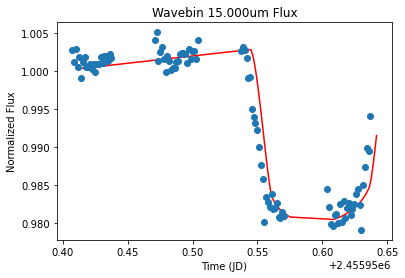

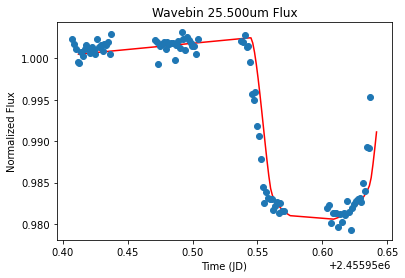

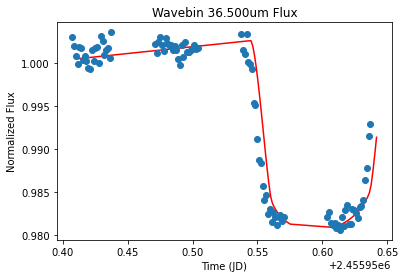

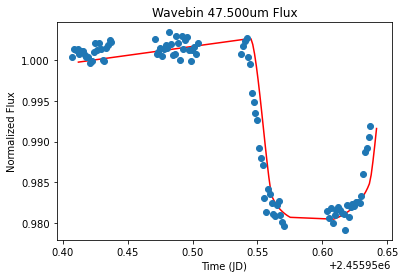

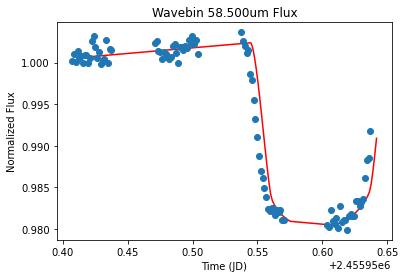

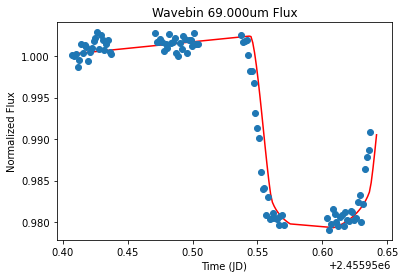

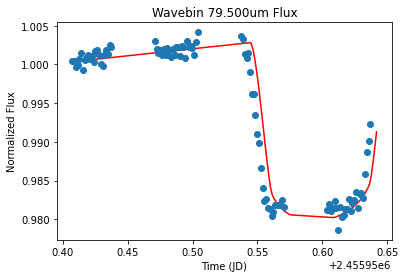

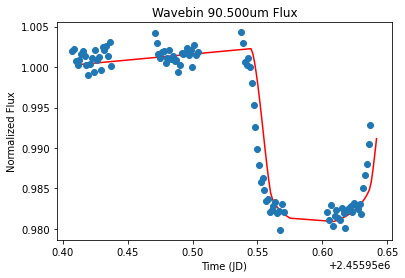

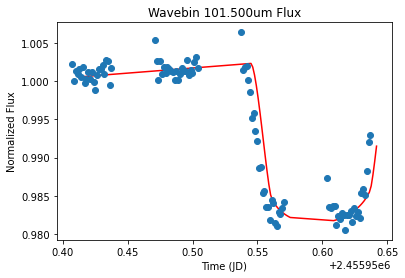

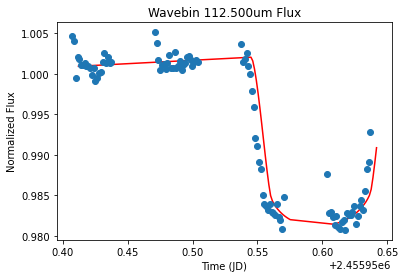

In [63]:
#optimizing/plotting visit 1 wavebin channels 
v1_wavebins=optimize_batman_model(new_spec_v1,transit_model,nbins=10,showPlot=True)
v1_wavebins

([array([ 1.38482708e-01, -6.97250188e+01,  2.87989378e-05,  2.42977182e+02,
          2.58017184e+02]),
  array([ 1.43425474e-01, -3.37019458e+04,  1.37229765e-02,  3.54262990e+02,
          2.27863611e+01]),
  array([ 1.42655476e-01, -3.47762119e+04,  1.41603894e-02,  4.73943353e+02,
          9.95501730e+01]),
  array([ 1.45133551e-01, -4.28384986e+04,  1.74431459e-02,  3.21437291e+02,
         -4.72440124e+01]),
  array([ 1.42466903e-01, -2.51317001e+04,  1.02333919e-02,  1.35542082e+02,
          6.78372434e+01]),
  array([ 1.46122542e-01, -2.51497536e+04,  1.02407431e-02,  5.25172404e+01,
          8.55586211e+01]),
  array([ 1.45650008e-01, -3.62604325e+04,  1.47647264e-02,  1.34317696e+02,
          9.41932731e+01]),
  array([ 1.40267784e-01, -2.40192834e+04,  9.78044437e-03,  4.02641493e+02,
          1.76092009e+02]),
  array([ 1.33922684e-01, -6.97251657e+01,  2.87988959e-05,  2.01388167e+02,
          3.11355052e+02]),
  array([ 1.37671363e-01, -2.10605458e+04,  8.57572209e

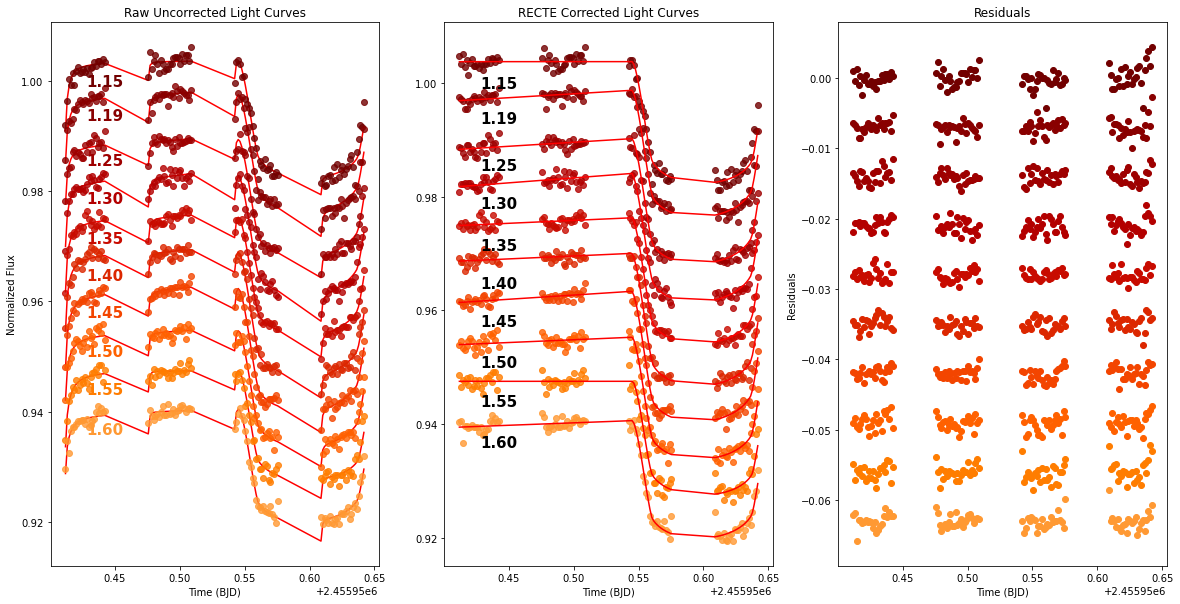

In [170]:
#optimizing/plotting visit 1 wavebin channels with RECTE
info_v1 = corot1_visit1_results
exptime = info_v1['Exp Time'][0]
im = fits.getdata('corot1_visit1_median_image.fits')

v1_wavebin_channels = optimize_batman_model_RECTE(spec_v1,transit_model_RECTE,nbins=10,showPlot=True)
v1_wavebin_channels

In [101]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v1_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v1_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 20


## Secondary Eclipses (Visit 2, 3, & 4)

### Visit 2

([684.9181330288151,
  103.48984493434209,
  -226.48189596200828,
  933.6999000343541,
  1072.5135776721643,
  761.7727334319407,
  1187.7604749491236,
  1612.6102978794002,
  1472.6324061323778,
  1782.8511031711155],
 [396.3027663399423,
  548.8978170090985,
  293.10682527280125,
  330.2072555731304,
  943.7604274951742,
  411.75164056375314,
  825.7224121191856,
  513.6603678133667,
  476.26108741826977,
  456.3385912419047])

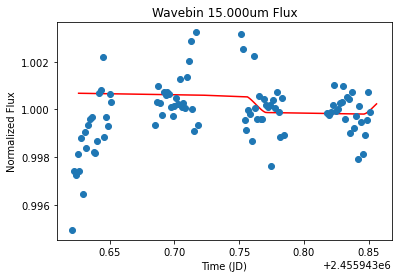

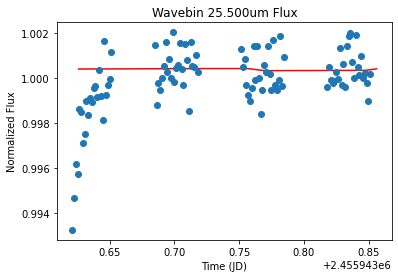

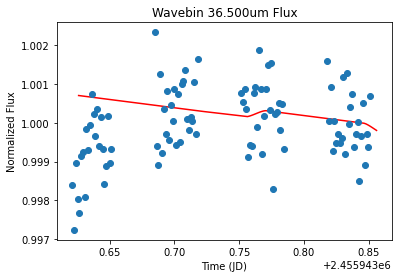

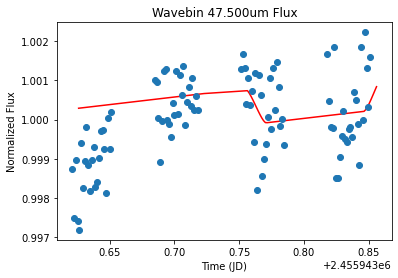

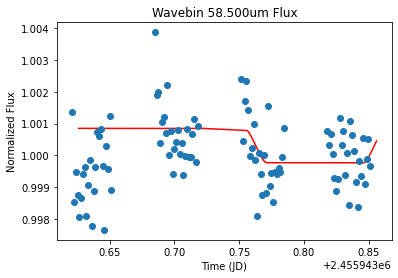

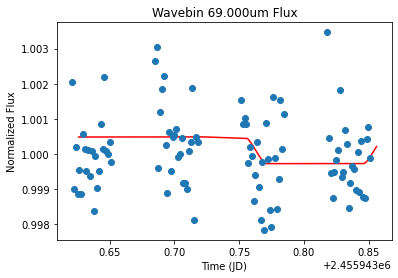

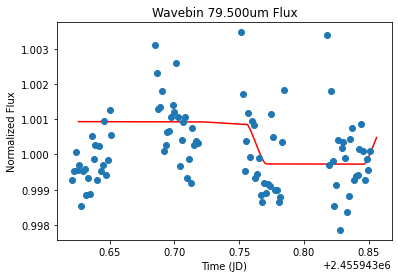

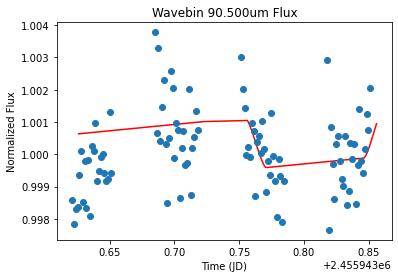

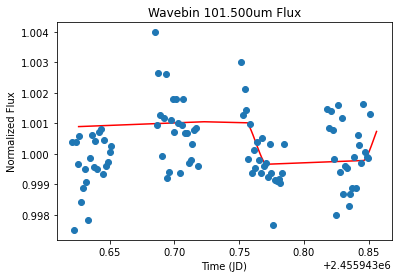

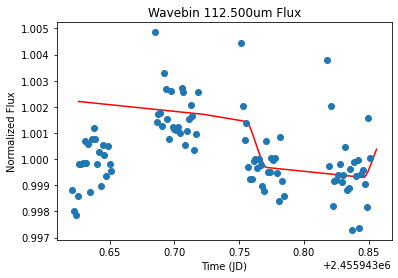

In [65]:
#optimizing/plotting visit 2 wavebin channels 
v2_wavebins=optimize_batman_model(new_spec_v2,eclipse_model,nbins=10,showPlot=True)
v2_wavebins

([array([ 1.13814804e+03, -1.29151387e+04,  5.25913454e-03, -4.76705070e+02,
          1.27505309e+02]),
  array([ 6.93668604e+02, -1.95221451e+04,  7.94934551e-03, -7.31849015e+02,
          2.40249480e+01]),
  array([ 2.06338358e+01, -1.55223999e+02,  6.36107624e-05, -1.48407370e+02,
          1.46612510e+02]),
  array([ 1.49691745e+03, -2.75058940e+04,  1.12001318e-02, -3.13612799e+01,
          1.31280192e+02]),
  array([ 5.89086161e+02, -6.97126694e+01,  2.87923281e-05,  1.47366631e+02,
          1.32392113e+03]),
  array([ 6.35414980e+02, -6.97106843e+01,  2.87916564e-05,  2.85038770e+02,
          3.32092981e+02]),
  array([ 9.76107964e+02, -1.90373052e+03,  7.75559358e-04,  1.18777589e+02,
          1.21683222e+03]),
  array([ 1.47344555e+03, -9.13348494e+03,  3.71933779e-03, -3.91632836e+01,
          7.22277084e+02]),
  array([ 1.55454887e+03, -9.14809627e+03,  3.72528713e-03,  1.40669909e+02,
          6.94376346e+02]),
  array([ 1.69611568e+03,  3.50049005e+03, -1.42490667e

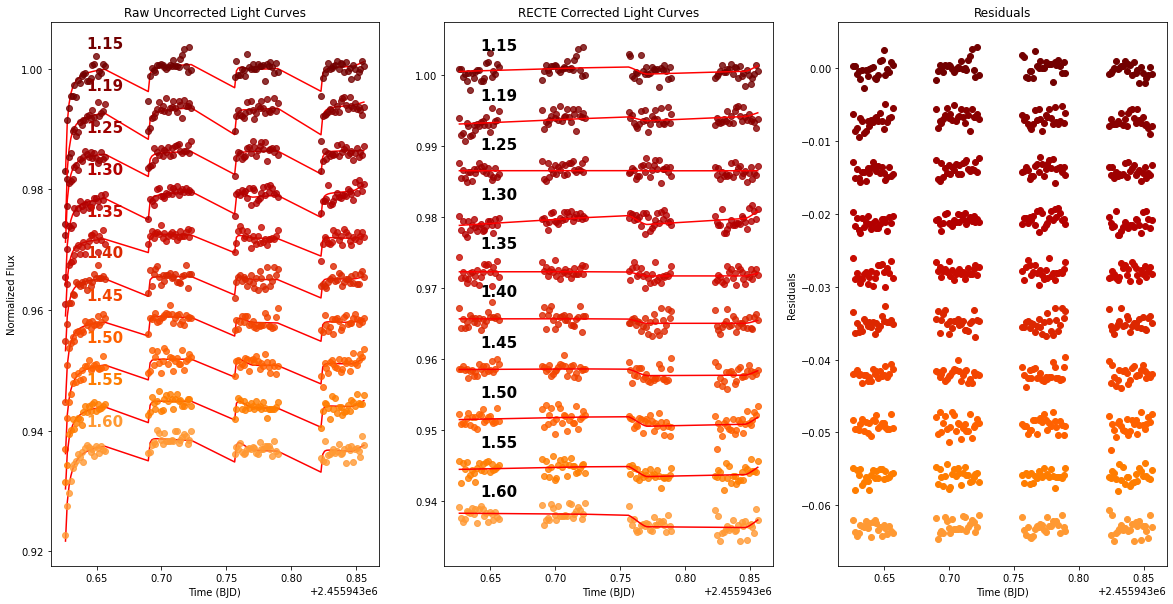

In [171]:
#optimizing/plotting visit 2 wavebin channels with RECTE
info_v2 = corot1_visit2_results
exptime = info_v2['Exp Time'][0]
im = fits.getdata('corot1_visit2_median_image.fits')

v2_wavebin_channels = optimize_batman_model_RECTE(spec_v2,eclipse_model_RECTE,nbins=10,showPlot=True)
v2_wavebin_channels

In [100]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v2_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v2_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 18


###  Visit 3

([595.4872750686112,
  768.4144527566714,
  606.910416488306,
  445.09339800868713,
  818.6490756625872,
  852.1929352220277,
  754.0898320799923,
  949.486862906649,
  984.6660516021187,
  846.1135979660137],
 [261.7737072721045,
  258.59315248858303,
  247.88248561217227,
  231.82679386587688,
  269.72518995575973,
  224.91005150347468,
  222.0282019488206,
  219.62989192656661,
  292.5911733501469,
  268.74310095950415])

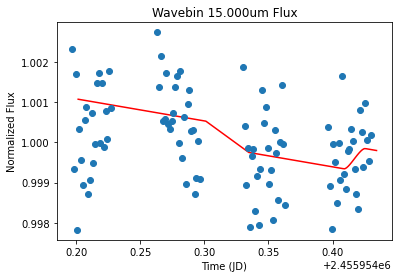

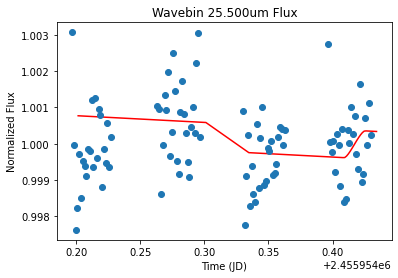

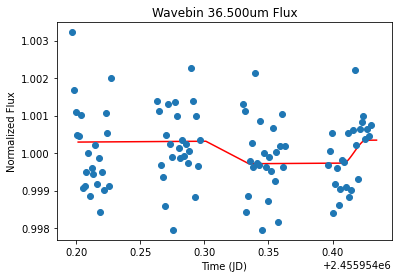

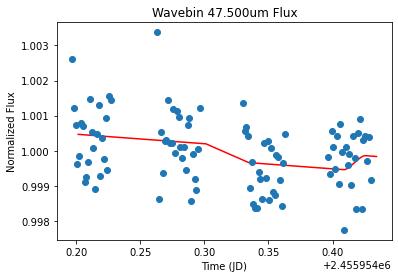

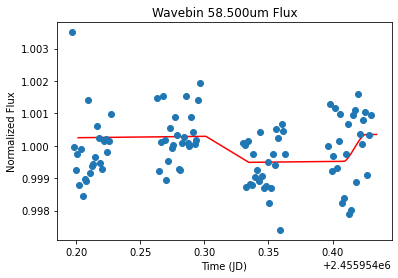

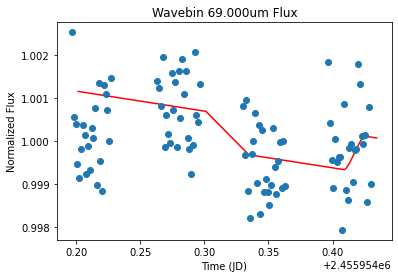

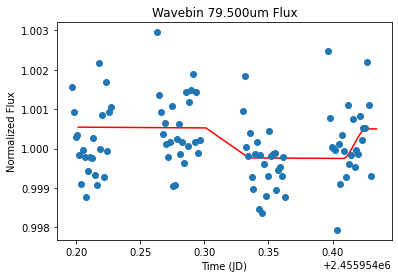

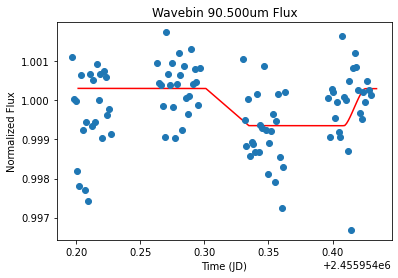

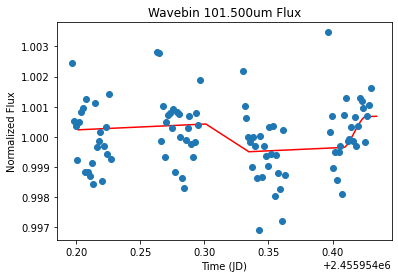

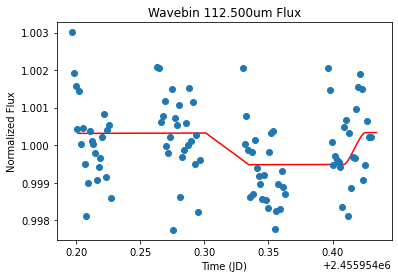

In [137]:
#optimizing/plotting visit 3 wavebin channels 
v3_wavebins=optimize_batman_model(new_spec_v3,eclipse_model,nbins=10,showPlot=True)
v3_wavebins

([array([ 8.26551864e+02,  7.60490560e+03, -3.09611037e-03,  2.35657618e+02,
          2.07950826e+02]),
  array([ 9.09037755e+02, -5.70443657e+03,  2.32310372e-03,  2.82154019e+02,
          1.37613912e+02]),
  array([ 6.92404355e+02, -8.62370180e+03,  3.51175170e-03,  6.13265021e+02,
          1.13873748e+02]),
  array([ 6.60954994e+02,  3.24548517e+03, -1.32106907e-03,  4.55169297e+02,
          1.98677424e+02]),
  array([ 9.49941739e+02, -9.06659187e+03,  3.69208482e-03,  4.48272574e+02,
          1.19377961e+02]),
  array([ 1.09689646e+03,  2.20408748e+03, -8.97039365e-04,  3.01136851e+02,
          2.25464309e+02]),
  array([ 9.72705540e+02, -6.97107999e+01,  2.87915016e-05,  2.86586538e+02,
          2.71245836e+02]),
  array([ 1.11672644e+03, -5.29686083e+03,  2.15714952e-03,  2.05439469e+02,
          1.49684069e+02]),
  array([ 1.37879425e+03, -1.05483608e+04,  4.29542195e-03,  4.85177223e+02,
          3.68185440e+02]),
  array([ 1.26418409e+03, -9.31187175e+03,  3.79195623e

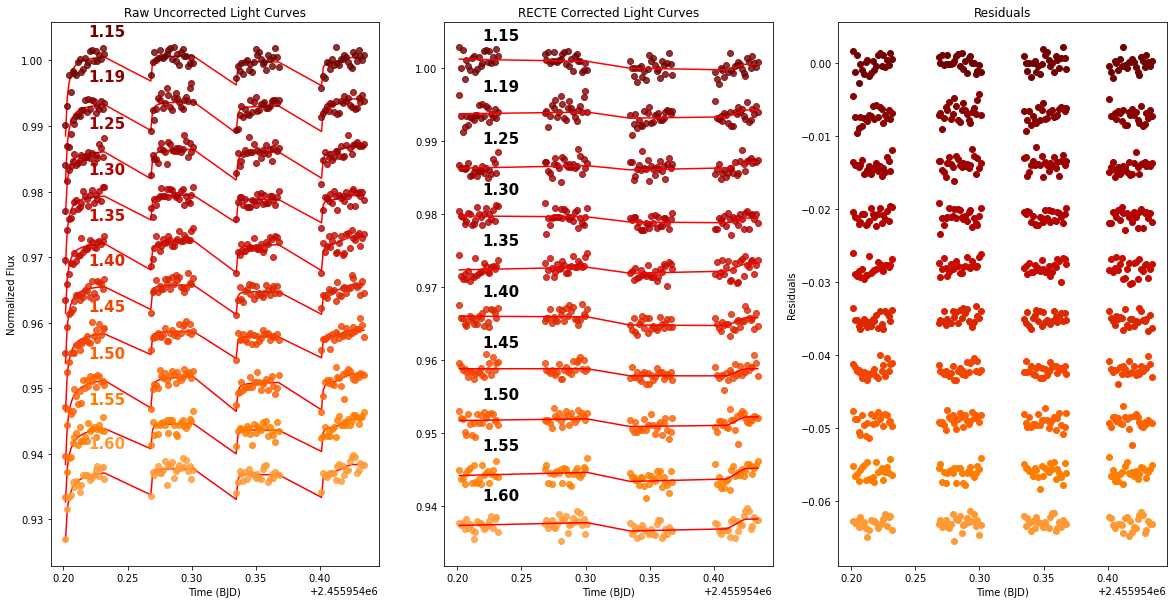

In [172]:
#optimizing/plotting visit 3 wavebin channels with RECTE
info_v3 = corot1_visit3_results
exptime = info_v3['Exp Time'][0]
im = fits.getdata('corot1_visit3_median_image.fits')

v3_wavebin_channels = optimize_batman_model_RECTE(spec_v3,eclipse_model_RECTE,nbins=10,showPlot=True)
v3_wavebin_channels

In [99]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v3_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v3_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


###  Visit 4

In [138]:
#optimizing/plotting visit 4 wavebin channels 
v4_wavebins=optimize_batman_model(new_spec_v4,eclipse_model,nbins=10)
v4_wavebins

([379.7677731714248,
  1037.867651549156,
  878.342109119343,
  774.1891354234475,
  1356.7158927466241,
  963.088638795631,
  1262.3848958583583,
  1010.5561186410288,
  1257.8653227009625,
  1215.0814416129888],
 [353.86487364534764,
  215.71920608084022,
  243.50627551348506,
  261.5785971455163,
  271.32299104367763,
  239.00781304259576,
  352.7534883885441,
  335.63504928789416,
  327.7921656479602,
  329.8756440414528])

([array([ 6.19487763e+02, -1.50619454e+03,  6.13687681e-04, -4.09243591e+01,
          3.35458890e+02]),
  array([ 1.21246403e+03, -1.38097214e+04,  5.62334173e-03, -2.33616472e+02,
          1.46339370e+02]),
  array([ 1.99798692e+02, -6.97105064e+01,  2.87914987e-05, -2.93420121e+01,
          2.18653934e+02]),
  array([ 9.67334500e+02, -7.04346706e+01,  2.90862955e-05, -1.09260750e+02,
          1.67600326e+02]),
  array([ 1.56677318e+03, -3.34972863e+04,  1.36395707e-02,  4.28157717e+01,
          2.12400485e+02]),
  array([ 1.26669326e+03, -8.25825395e+03,  3.36293849e-03, -1.01333056e+02,
          2.46361808e+02]),
  array([ 1.51547118e+03, -2.05082464e+04,  8.35079477e-03, -3.59022346e+02,
          2.15470863e+02]),
  array([ 1.37443432e+03, -1.46815820e+04,  5.97833900e-03, -2.04037616e+02,
          3.86149665e+02]),
  array([ 1.49533114e+03, -1.51846151e+04,  6.18316026e-03, -1.26085581e+02,
          1.81777155e+02]),
  array([ 1.55535009e+03, -1.12616618e+04,  4.58584264e

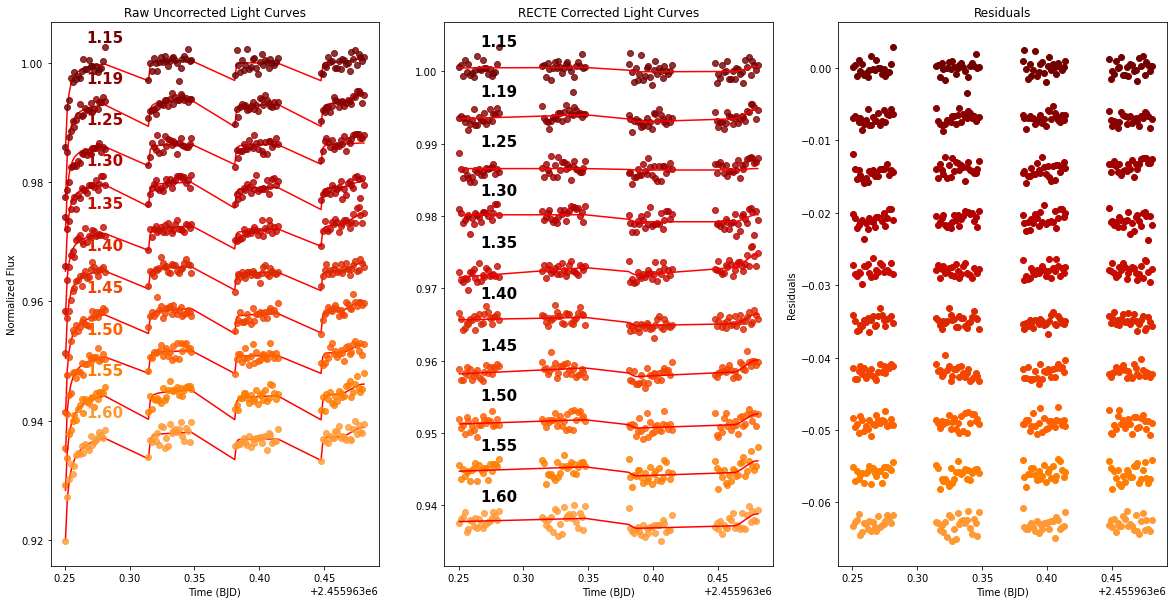

In [173]:
#optimizing/plotting visit 4 wavebin channels with RECTE
info_v4 = corot1_visit4_results
exptime = info_v4['Exp Time'][0]
im = fits.getdata('corot1_visit4_median_image.fits')

v4_wavebin_channels = optimize_batman_model_RECTE(spec_v4,eclipse_model_RECTE,nbins=10,showPlot=True)
v4_wavebin_channels

In [98]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v4_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v4_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


# Transit & Eclipse Spectrums

In [139]:
def hstwfc3_wavecal(dispIndices,xc0=None,yc0=None,DirIm_x_appeture=522,DirIm_y_appeture=522,SpecIm_x_appeture=410,
                    SpecIm_y_appeture=522,subarray=128):
    """
        Wavelength calibration to turn the dispersion pixels into wavelengths
        
        Parameters
        -------------
        dispIndices: numpy array 
            Dispersion Middle X-axis values
        xc0: float
            X coordinate of direct image centroid
        yc0: float
            Y coordinate of direct image centroid
        DirIm_x_appeture: float
            Chip Reference X-Pixel dependent upon direct image centroid apeture 
        DirIm_y_appeture: float
            Chip Reference Y-Pixel dependent upon direct image centroid apeture
        SpecIm_x_appeture: float
            Chip Reference X-Pixel dependent upon spectral image centroid apeture 
        SpecIm_y_appeture: float
            Chip Reference Y-Pixel dependent upon spectral image centroid apeture
        subarray:
            Length of detector array 
            
        Note that direct image and spectral image should be taken with the
        same aperture. If not, please adjust the centroid measurement
        according to table in: https://www.stsci.edu/hst/instrumentation/focus-and-pointing/fov-geometry
    """
    
    #accounting for the offset from the direct image centroid
    x_offset = (DirIm_x_appeture - SpecIm_x_appeture)
    y_offset = (DirIm_y_appeture - SpecIm_y_appeture)

    xc = xc0 - (x_offset)
    yc = yc0 - (y_offset)

    coord0 = (1014 - subarray) // 2
    xc = xc + coord0
    yc = yc + coord0

    DLDP0 = [8949.40742544, 0.08044032819916265]
    DLDP1 = [44.97227893276267,
             0.0004927891511929662,
             0.0035782416625653765,
             -9.175233345083485e-7,
             2.2355060371418054e-7,  
             -9.258690000316504e-7]

    # calculate field dependent dispersion coefficient
    p0 = DLDP0[0] + DLDP0[1] * xc
    p1 = DLDP1[0] + DLDP1[1] * xc + DLDP1[2] * yc + \
         DLDP1[3] * xc**2 + DLDP1[4] * xc * yc + DLDP1[5] * yc**2

    dx = np.arange(1014) - xc
    wavelength = (p0 + dx * p1)/10000 #in microns
    if subarray < 1014:
        i0 = (1014 - subarray) // 2
        wavelength = wavelength[i0: i0 + subarray]
        f = interp1d(np.arange(subarray),wavelength)
        wavelengths = f(dispIndices)
    return wavelengths

In [140]:
from __future__ import print_function, division
import numpy as np
from scipy.interpolate import interp1d


def wavecal(self,dispIndices,waveCalMethod=None,head=None,**kwargs):
        """
        Wavelength calibration to turn the dispersion pixels into wavelengths
        
        Parameters
        -------------
        dispIndices: numpy array 
            Dispersion Middle X-axis values
            
        waveCalMethod: str, optional 
            Corresponds to instrumnetation used
            
        head: astropy FITS header, optional
            header for image
        """
        if waveCalMethod == None:
            waveCalMethod = self.param['waveCalMethod']
        
        if waveCalMethod == None:
            wavelengths = dispIndices
        elif waveCalMethod == 'NIRCamTS':
            if head == None:
                head = fits.getheader(self.specFile,extname='ORIG HEADER')
            wavelengths = instrument_specific.jwst_inst_funcs.ts_wavecal(dispIndices,obsFilter=head['FILTER'],
                                                                         **kwargs)
        elif waveCalMethod == 'wfc3Dispersion':
            wavelengths=hstwfc3_wavecal(dispIndices,**kwargs)
            
        else:
            raise Exception("Unrecognized wavelength calibration method {}".format(waveCalMethod))
            
        wavelengths = wavelengths - self.param['waveCalOffset']
        return wavelengths

In [141]:
#wavebins values 
xc0_v1 = 75.36  
yc0_v1 = 71.57

xc0_v2 = 73.593  
yc0_v2 = 73.2098 

xc0_v3 = 75.0211
yc0_v3= 71.4784

xc0_v4=75.3891
yc0_v4=71.4633

#calibrations 
table_noise_v1=spec_v1.print_noise_wavebin(nbins=10)
table_noise_v2=spec_v2.print_noise_wavebin(nbins=10)
table_noise_v3=spec_v3.print_noise_wavebin(nbins=10)
table_noise_v4=spec_v4.print_noise_wavebin(nbins=10)

dismid_v1 = table_noise_v1['Disp Mid']
dismid_v2 = table_noise_v2['Disp Mid']
dismid_v3 = table_noise_v3['Disp Mid']
dismid_v4 = table_noise_v4['Disp Mid']

wavebins_v1 = wavecal(spec_v1,dismid_v1,xc0=xc0_v1,yc0=yc0_v1,waveCalMethod = 'wfc3Dispersion')
wavebins_v2 = wavecal(spec_v2,dismid_v2,xc0=xc0_v2,yc0=yc0_v2,waveCalMethod = 'wfc3Dispersion')
wavebins_v3 = wavecal(spec_v3,dismid_v3,xc0=xc0_v3,yc0=yc0_v3,waveCalMethod = 'wfc3Dispersion')
wavebins_v4 = wavecal(spec_v4,dismid_v4,xc0=xc0_v4,yc0=yc0_v4,waveCalMethod = 'wfc3Dispersion')

In [142]:
#start and end disp to wavelength
disst_v1 = table_noise_v1['Disp St']
disst_v2 = table_noise_v2['Disp St']
disst_v3 = table_noise_v3['Disp St']
disst_v4 = table_noise_v4['Disp St']

disend_v1 = table_noise_v1['Disp End']
disend_v2 = table_noise_v2['Disp End']
disend_v3 = table_noise_v3['Disp End']
disend_v4 = table_noise_v4['Disp End']

wavebins_st_v1 = wavecal(spec_v1,disst_v1,xc0=xc0_v1,yc0=yc0_v1,waveCalMethod = 'wfc3Dispersion')
wavebins_st_v2 = wavecal(spec_v2,disst_v2,xc0=xc0_v2,yc0=yc0_v2,waveCalMethod = 'wfc3Dispersion')
wavebins_st_v3 = wavecal(spec_v3,disst_v3,xc0=xc0_v3,yc0=yc0_v3,waveCalMethod = 'wfc3Dispersion')
wavebins_st_v4 = wavecal(spec_v4,disst_v4,xc0=xc0_v4,yc0=yc0_v4,waveCalMethod = 'wfc3Dispersion')

wavebins_end_v1 = wavecal(spec_v1,disend_v1,xc0=xc0_v1,yc0=yc0_v1,waveCalMethod = 'wfc3Dispersion')
wavebins_end_v2 = wavecal(spec_v2,disend_v2,xc0=xc0_v2,yc0=yc0_v2,waveCalMethod = 'wfc3Dispersion')
wavebins_end_v3 = wavecal(spec_v3,disend_v3,xc0=xc0_v3,yc0=yc0_v3,waveCalMethod = 'wfc3Dispersion')
wavebins_end_v4 = wavecal(spec_v4,disend_v4,xc0=xc0_v4,yc0=yc0_v4,waveCalMethod = 'wfc3Dispersion')

#print(wavebins_v1)
#print(wavebins_v4)

In [143]:
#without RECTE corrections
yerr_v1=v1_wavebins[1]
yerr_v2=v2_wavebins[1]
yerr_v3=v3_wavebins[1]
yerr_v4=v4_wavebins[1]

popt_v1=v1_wavebins[0]
popt_v2=v2_wavebins[0]
popt_v3=v3_wavebins[0]
popt_v4=v4_wavebins[0]

#with RECTE corrections

yerr_v1_RECTE_i = v1_wavebin_channels[1]
yerr_v1_RECTE = [item[0] for item in yerr_v1_RECTE_i]

yerr_v2_RECTE_i = v2_wavebin_channels[1]
yerr_v2_RECTE = [item[0] for item in yerr_v2_RECTE_i]

yerr_v3_RECTE_i = v3_wavebin_channels[1]
yerr_v3_RECTE = [item[0] for item in yerr_v3_RECTE_i]

yerr_v4_RECTE_i = v4_wavebin_channels[1]
yerr_v4_RECTE = [item[0] for item in yerr_v4_RECTE_i]

popt_v1_RECTE_i = v1_wavebin_channels[0]
popt_v1_RECTE = [item[0] for item in popt_v1_RECTE_i]

popt_v2_RECTE_i = v2_wavebin_channels[0]
popt_v2_RECTE = [item[0] for item in popt_v2_RECTE_i]

popt_v3_RECTE_i = v3_wavebin_channels[0]
popt_v3_RECTE = [item[0] for item in popt_v3_RECTE_i]

popt_v4_RECTE_i = v4_wavebin_channels[0]
popt_v4_RECTE = [item[0] for item in popt_v4_RECTE_i]

## Secondary Eclipses

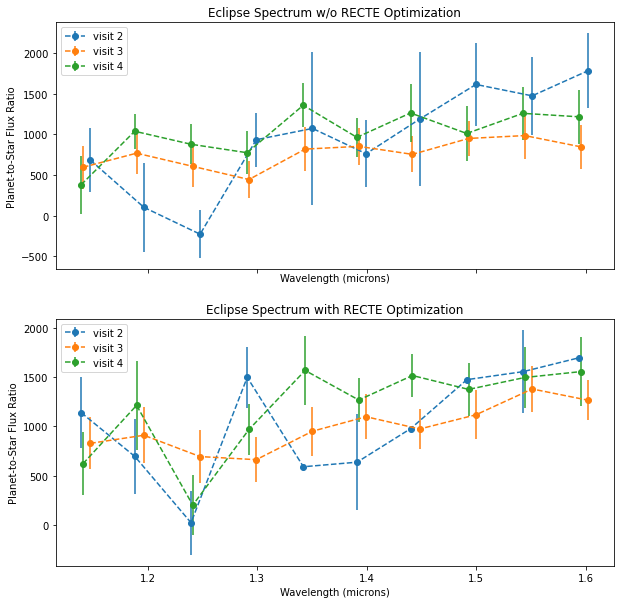

In [144]:
#without RECTE corrections
fig, (ax, ax2) = plt.subplots(2,sharex=True,figsize=(10,10))

ax.errorbar(wavebins_v2,popt_v2,yerr=yerr_v2,label='visit 2', fmt='--o')
ax.errorbar(wavebins_v3,popt_v3,yerr=yerr_v3,label='visit 3', fmt='--o')
ax.errorbar(wavebins_v4,popt_v4,yerr=yerr_v4,label='visit 4', fmt='--o')
ax.set_title('Eclipse Spectrum w/o RECTE Optimization')
ax.legend(loc ='upper left') 
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Flux Ratio')

#with RECTE corrections

ax2.errorbar(wavebins_v1,popt_v2_RECTE,yerr=yerr_v2_RECTE,label='visit 2', fmt='--o')
ax2.errorbar(wavebins_v2,popt_v3_RECTE,yerr=yerr_v3_RECTE,label='visit 3', fmt='--o')
ax2.errorbar(wavebins_v3,popt_v4_RECTE,yerr=yerr_v4_RECTE,label='visit 4', fmt='--o')
ax2.set_title('Eclipse Spectrum with RECTE Optimization')
ax2.legend(loc ='upper left') 
ax2.set_xlabel('Wavelength (microns)')
ax2.set_ylabel('Planet-to-Star Flux Ratio')

fig.savefig('saved_figures/new_eclipse_spectrums.pdf')

In [145]:
# eclipse average without RECTE corrections
yerr = [(g+h+k) / 3 for g, h,k in zip( yerr_v2,yerr_v3,yerr_v4)]
popt_fp = [(g+h+k) / 3 for g, h,k in zip( popt_v2,popt_v3,popt_v4)]

#eclispe average with RECTE corrections
yerr_RECTE = [(g+h+k) / 3 for g, h,k in zip(yerr_v2_RECTE,yerr_v3_RECTE,yerr_v4_RECTE)]
popt_fp_RECTE = [(g+h+k) / 3 for g, h,k in zip( popt_v2_RECTE,popt_v3_RECTE,popt_v4_RECTE)]

#averaging the wavebins
wavebins_avg = [(g+h+k)/3 for g,h,k in zip(wavebins_v2,wavebins_v3,wavebins_v4)]

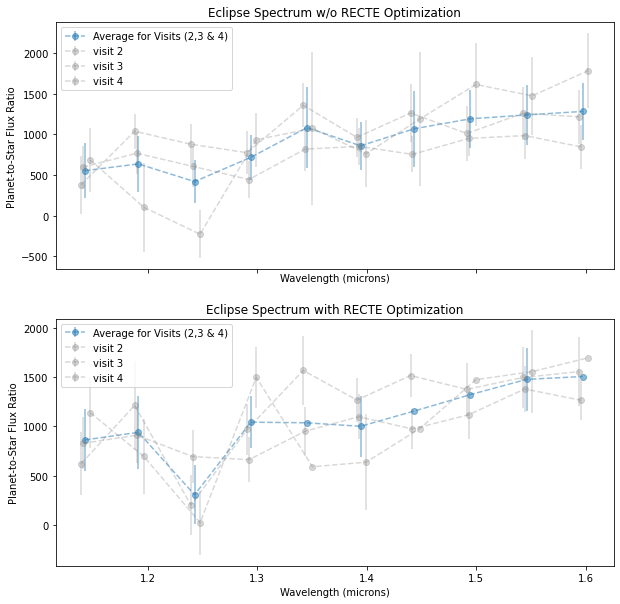

In [146]:
#without RECTE corrections
fig, (ax, ax2) = plt.subplots(2,sharex=True,figsize=(10,10))

ax.errorbar(wavebins_avg,popt_fp,yerr=yerr,label='Average for Visits (2,3 & 4)', fmt='--o', alpha =0.5)
ax.errorbar(wavebins_v2,popt_v2,yerr=yerr_v2,label='visit 2', fmt='--o', color='grey',alpha=0.30)
ax.errorbar(wavebins_v3,popt_v3,yerr=yerr_v3,label='visit 3', fmt='--o',color='grey',alpha=0.30)
ax.errorbar(wavebins_v4,popt_v4,yerr=yerr_v4,label='visit 4', fmt='--o',color='grey',alpha=0.30)
ax.set_title('Eclipse Spectrum w/o RECTE Optimization')
ax.legend(loc ='upper left') 
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Flux Ratio')

#with RECTE corrections

ax2.errorbar(wavebins_avg,popt_fp_RECTE,yerr=yerr_RECTE,label='Average for Visits (2,3 & 4)', fmt='--o',alpha=0.5)
ax2.errorbar(wavebins_v2,popt_v2_RECTE,yerr=yerr_v2_RECTE,label='visit 2', fmt='--o', color='grey',alpha=0.30)
ax2.errorbar(wavebins_v3,popt_v3_RECTE,yerr=yerr_v3_RECTE,label='visit 3', fmt='--o', color='grey',alpha=0.30)
ax2.errorbar(wavebins_v4,popt_v4_RECTE,yerr=yerr_v4_RECTE,label='visit 4', fmt='--o', color='grey',alpha=0.30)
ax2.set_title('Eclipse Spectrum with RECTE Optimization')
ax2.legend(loc ='upper left') 
ax2.set_xlabel('Wavelength (microns)')
ax2.set_ylabel('Planet-to-Star Flux Ratio')

fig.savefig('saved_figures/new_Average_Eclipse_Spectrum.pdf')

### Mike Line Theoretical Models

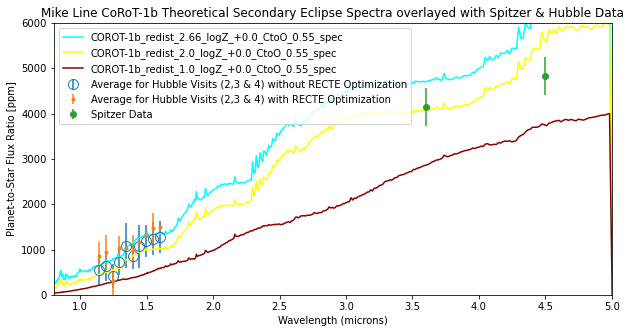

In [147]:
redist_266=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
redist_1=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
redist_2=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
spitzer_wavelengths=[3.6,4.5] #in microns
spitzer_eclipse_depths=[(0.415/100)*1000000, (0.482/100)*1000000] #in ppm
spitzer_eclipse_depths_errors=[(0.042/100)*1000000, (0.042/100)*1000000] #in ppm

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(redist_266['#Wavelength[um]'],redist_266['Fp/Fstar[ppm]'],label='COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_spec',c='cyan')
ax.plot(redist_2['#Wavelength[um]'],redist_2['Fp/Fstar[ppm]'],label='COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_spec',c='yellow')
ax.plot(redist_1['#Wavelength[um]'],redist_1['Fp/Fstar[ppm]'],label='COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_spec',c='darkred')
ax.errorbar(wavebins_avg,popt_fp,yerr=yerr,label='Average for Hubble Visits (2,3 & 4) without RECTE Optimization', fmt='o',ms=10,mfc='none')
ax.errorbar(wavebins_avg,popt_fp_RECTE,yerr=yerr_RECTE,label='Average for Hubble Visits (2,3 & 4) with RECTE Optimization', fmt='o',ms=3)
ax.errorbar(spitzer_wavelengths,spitzer_eclipse_depths,yerr=spitzer_eclipse_depths_errors,fmt='o',label='Spitzer Data')


ax.set_xlim(0.8,5)
ax.set_ylim(0,6000)

#ax.set_xlim(0.8,2.0)
#ax.set_ylim(0,1400)
ax.legend(loc='upper left')
ax.set_title('Mike Line CoRoT-1b Theoretical Secondary Eclipse Spectra overlayed with Spitzer & Hubble Data')
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Flux Ratio [ppm]')

fig.savefig('saved_figures/new_Mike_Line_CoRoT-1b_Theoretical_Secondary_Eclipse_Spectra_Overlayed_with_Spitzer_&_Hubble_Data.pdf')

## Primary Transit

In [148]:
ranjan_rp = [0.1380, 0.1410, 0.1384, 0.1410, 0.1389, 0.1410, 0.1396, 0.1370, 0.1307, 0.1319]
ranjan_wavelength_st =[1.118,1.170,1.218,1.264,1.311,1.357,1.405,1.455,1.507,1.561]
ranjan_wavelength_end=[1.170,1.218,1.264,1.311,1.357,1.405,1.455,1.507,1.561,1.619]

ranjan_avg_wavelength=[(g + h) / 2 for g, h in zip(ranjan_wavelength_st, ranjan_wavelength_end)]
#ranjan_avg_wavelength

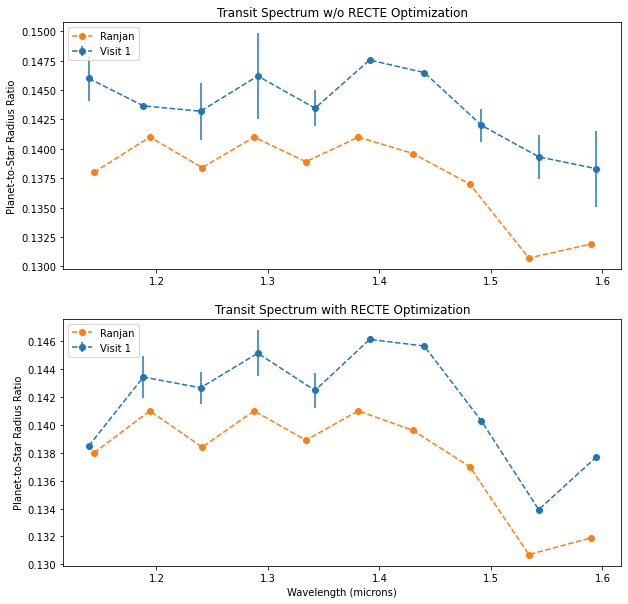

In [149]:
fig, (ax, ax2) = plt.subplots(2,sharex=False,figsize=(10,10))

ax.errorbar(wavebins_v1,popt_v1,yerr=yerr_v1,label='Visit 1', fmt='--o')
ax.set_title('Transit Spectrum w/o RECTE Optimization')
#ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Radius Ratio')
ax.plot(ranjan_avg_wavelength,ranjan_rp,'--o',label='Ranjan') #put in ranjan wavelengths
ax.legend(loc ='upper left') 


ax2.errorbar(wavebins_v1,popt_v1_RECTE,yerr=yerr_v1_RECTE,label='Visit 1', fmt='--o')
ax2.plot(ranjan_avg_wavelength,ranjan_rp,'--o',label='Ranjan') #put in ranjan wavelengths
ax2.legend(loc ='upper left')
ax2.set_title('Transit Spectrum with RECTE Optimization')
ax2.set_xlabel('Wavelength (microns)')
ax2.set_ylabel('Planet-to-Star Radius Ratio')

fig.savefig('saved_figures/new_ranjan_transit_spectrum_comparison.pdf')


### Mike Line Theoretical Model

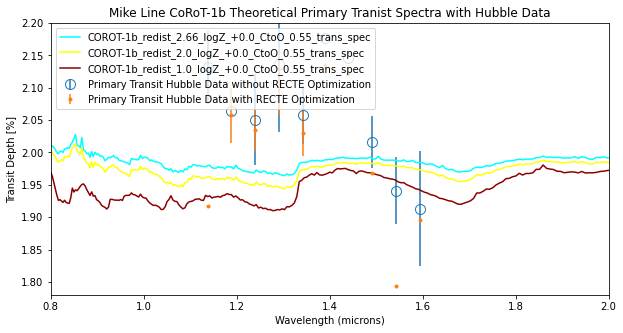

In [150]:
redist_266_trans=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_trans_spec.csv',sep=" ")
redist_1_trans=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_trans_spec.csv',sep=" ")
redist_2_trans=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_trans_spec.csv',sep=" ")

squared_popt_v1 = [(number ** 2)*100 for number in popt_v1]
squared_popt_v1_RECTE = [(number ** 2)*100 for number in popt_v1_RECTE]

modified_yerr_v1 = []
modified_yerr_v1_RECTE=[]

#this code multiplies Rp/Rstar times the error times 2
for num1, num2 in zip(popt_v1, yerr_v1):
    modified_yerr_v1.append(2*(num1 * num2)*100)
for num1, num2 in zip(popt_v1_RECTE, yerr_v1_RECTE):
    modified_yerr_v1_RECTE.append(2*(num1 * num2)*100)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(redist_266_trans['#Wavelength[um]'],redist_266_trans['Transit_Depth(Rp/Rstar)^2']*100,label='COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_trans_spec',c='cyan')
ax.plot(redist_2_trans['#Wavelength[um]'],redist_2_trans['Transit_Depth(Rp/Rstar)^2']*100,label='COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_trans_spec',c='yellow')
ax.plot(redist_1_trans['#Wavelength[um]'],redist_1_trans['Transit_Depth(Rp/Rstar)^2']*100,label='COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_trans_spec',c='darkred')
ax.errorbar(wavebins_v1,squared_popt_v1,yerr=modified_yerr_v1,label='Primary Transit Hubble Data without RECTE Optimization', fmt='o',ms=10,mfc='none')
ax.errorbar(wavebins_v1,squared_popt_v1_RECTE,yerr=modified_yerr_v1_RECTE,label='Primary Transit Hubble Data with RECTE Optimization', fmt='o',ms=3)

#ax.plot(wavebins_v1,squared_popt_v1,label='Primary Transit without RECTE Corrections')
#ax.plot(wavebins_v1,squared_popt_v1_RECTE,label='Primary Transit with RECTE Corrections')


ax.set_xlim(0.8,2.0)
ax.set_ylim(1.78,2.2)
ax.legend(loc='upper left')
ax.set_title('Mike Line CoRoT-1b Theoretical Primary Tranist Spectra with Hubble Data')
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Transit Depth [%]')
fig.savefig('saved_figures/new_Mike_Line_CoRoT-1b_Theoretical_Primary_Tranist_Spectra_with_Hubble_Data.pdf')

In [151]:
def blackbody_lam(x, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    x = 1e-6 *x # convert from microns to metres
    return 2*h*c**2 / (x**5 * (np.exp(h*c / (x*k*T)) - 1)) #returns intensity(or flux)


In [152]:
def Planet_to_Star_Flux_Ratio(x,T_planet,T_star=5907.6665,R_planet=rp, R_star=Rstar):
    #x in microns, temperature in Kelvins,Radii in same units 
    flux_planet = blackbody_lam(x,T_planet)*(np.pi)*(R_planet)**2
    flux_star = blackbody_lam(x,T_star)*(np.pi)*(R_star)**2
    planet_to_star_flux_ratio = ((flux_planet/flux_star).si.value)*1e6 #ppm

    return planet_to_star_flux_ratio

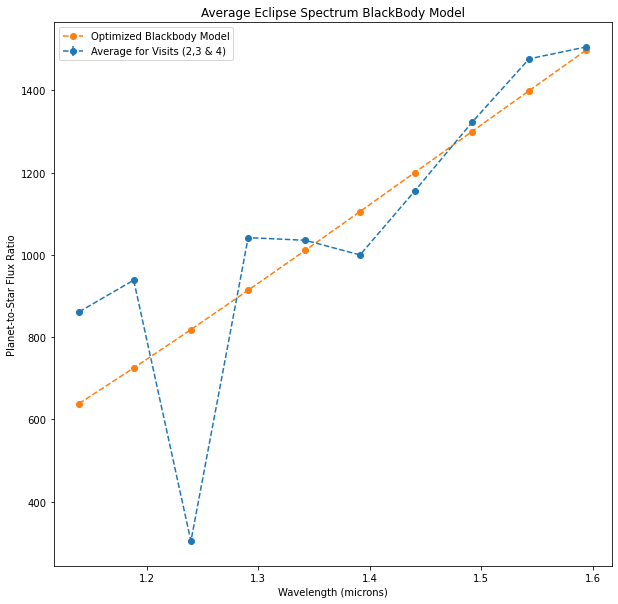

In [153]:
real_planet_to_star_flux_ratio=popt_fp_RECTE
median_error=[np.median(yerr_RECTE)]*len(popt_fp_RECTE)
optimized_temp, error_optimized_temp = curve_fit(Planet_to_Star_Flux_Ratio, wavebins_v1, real_planet_to_star_flux_ratio,p0=1000)#,sigma=median_error)

planet_to_star_flux_ratio = Planet_to_Star_Flux_Ratio(wavebins_v1,optimized_temp)

#plotting
fig, ax = plt.subplots(figsize=(10,10)) 

#real data
ax.errorbar(wavebins_v1,popt_fp_RECTE,yerr=np.median(yerr_RECTE),label='Average for Visits (2,3 & 4)', fmt='--o')

#blackbody modeled data
ax.plot(wavebins_v1,planet_to_star_flux_ratio,'--o',label='Optimized Blackbody Model')

#ax.set_title('Eclipse Spectrum with RECTE Correction')
ax.legend(loc ='upper left') 
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Flux Ratio')
ax.set_title('Average Eclipse Spectrum BlackBody Model')
fig.savefig('saved_figures/new_Blackbody_model.pdf')


In [154]:
optimized_temp

array([2301.81915223])

# Obtaining Header Information

In [155]:
#the visit that happened first in the time line January 17th 
head_v1_start = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit1/ibh717hrq_flt.fits')
print(head_v1_start['PA_V3']) #position angle of V3-axis of HST (deg)
print(head_v1_start['SCAN_ANG']) #position angle of scan line (deg) 
print(head_v1_start['P1_ORINT']) #orientation of pattern to coordinate frame (deg)
print(head_v1_start['PATTSTEP']) #position number of this point in the pattern

224.535599
0.0
0.0
0


In [156]:
head_v2_start = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit2/ibh719jlq_flt.fits')
print(head_v2_start['PA_V3']) #position angle of V3-axis of HST (deg)
print(head_v2_start['SCAN_ANG']) #position angle of scan line (deg) 
print(head_v2_start['P1_ORINT']) #orientation of pattern to coordinate frame (deg)
print(head_v2_start['PATTSTEP']) #position number of this point in the pattern

212.661407
0.0
0.0
0


In [157]:
head_v3_start = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit3/ibh720kdq_flt.fits')
print(head_v3_start['PA_V3']) #position angle of V3-axis of HST (deg)
print(head_v3_start['SCAN_ANG']) #position angle of scan line (deg) 
print(head_v3_start['P1_ORINT']) #orientation of pattern to coordinate frame (deg)
print(head_v3_start['PATTSTEP']) #position number of this point in the pattern

225.0
0.0
0.0
0


In [158]:
head_v4_start = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_visit4/ibh721qtq_flt.fits')
print(head_v4_start['PA_V3']) #position angle of V3-axis of HST (deg)
print(head_v4_start['SCAN_ANG']) #position angle of scan line (deg) 
print(head_v4_start['P1_ORINT']) #orientation of pattern to coordinate frame (deg)
print(head_v4_start['PATTSTEP']) #position number of this point in the pattern

225.0
0.0
0.0
0
